In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import random
import json
import os
from google.colab import files

In [ ]:
google_drive_folder_path = '/content/drive/MyDrive/LLM restructuring/experiments'

In [ ]:
frequencies = {
    'andare a': 68354,
    'cominciare a': 13220,
    'finire di': 1420,
    'provare a': 14057,
    'riuscire a': 34401,
    'poter': 237236,
    'dover': 67513,
    'stare per': 820,
    'continuare a': 42890,
    'smettere di': 9426,
    'voler': 59254,
    'tornare a': 24434,
    'tendere a': 1370,
    'soler': 174,
    'correre a': 1612,
    'salire a': 1707,
    'dire di': 17919,
    'scendere a': 3262,
    'osare': 3262,
    'preferire': 7501,
    'desiderare': 9516,
    'promettere di': 250,
    'scegliere di': 5328,
    'decidere di': 10050,
    'chiedere di': 8101,
    'pensare di': 13387,
    'credere di': 3484,
    'sperare di': 4431,
}

frequencies_conjugated = {
    'va a': 68354,
    'comincia a': 13220,
    'finisce di': 1420,
    'prova a': 14057,
    'riesce a': 34401,
    'può': 237236,
    'deve': 67513,
    'sta per': 820,
    'continua a': 42890,
    'smette di': 9426,
    'vuole': 59254,
    'torna a': 24434,
    'tende a': 1370,
    'suole': 174,
    'corre a': 1612,
    'sale a': 1707,
    'dice di': 17919,
    'scende a': 3262,
    'osa': 3262,
    'preferisce': 7501,
    'desidera': 9516,
    'promette di': 250,
    'sceglie di': 5328,
    'decide di': 10050,
    'chiede di': 8101,
    'pensa di': 13387,
    'crede di': 3484,
    'spera di': 4431,
}




In [ ]:



lexicon = {
    '[SUBJ]': [
        'il bambino', 'il ragazzo', 'il padre', 'il fratello', 'il nonno',
        'l\'amico', 'il professore', 'il medico', 'il cuoco', 'lo studente',
        'il venditore', 'il giornalista', 'l\'artista', 'il re', 'il principe',
        'lo zio', 'il cugino', 'il vicino', 'il pittore', 'lo scrittore',
        'il ballerino', 'il sarto', 'il muratore', 'il falegname', 'il meccanico',
        'l\'ingegnere', 'l\'avvocato', 'il prete', 'il soldato', 'il capitano',
        'il direttore', 'il gestore', 'l\'impiegato', 'l\'operaio', 'il poliziotto',
        'il pompiere', 'il musicista', 'il cantante', 'l\'attore', 'il regista',
        'il presentatore', 'il comico', 'il barbiere', 'il parrucchiere', 'il contadino',
        'il pescatore', 'il cacciatore', 'il pastore', 'il fornaio', 'il macellaio',
        'il fruttivendolo', 'il fioraio', 'il gioielliere', 'l\'idraulico', 'l\'elettricista',
        'il tassista', 'l\'autista', 'il pilota', 'il marinaio', 'il ferroviere',
        'l\'atleta', 'il calciatore', 'il cestista', 'il nuotatore', 'il pugile',
        'il ciclista', 'lo sciatore', 'il golfista', 'il tennista', 'il guerriero',
        'il cavaliere', 'il ladro', 'l\'assassino', 'il detective', 'il carcerato',
        'il testimone', 'il cliente', 'il paziente', 'il volontario', 'il benefattore',
        'il viaggiatore', 'l\'esploratore', 'il turista', 'il console', 'il vagabondo',
        'il chirurgo', 'il dottore', 'il matematico', 'il cancelliere', 'il perito',
        'il diplomatico', 'l\'astronomo', 'il critico', 'il sociologo', 'il maresciallo',
        'l\'archeologo', 'il geografo', 'il signore', 'l\'anziano', 'il campione'
    ],
    '[CL]': [ # Clitici accusativi e dativi comuni
        'lo'
    ],
    '[VERB_CL]': [ # Verbi transitivi (es. 'grabba desiderare [VERB_CL]')
        'scrutarlo', 'prenderlo', 'darlo', 'farlo', 'vederlo',
        'immaginarlo', 'leggerlo', 'imbastirlo', 'comprarlo', 'venderlo',
        'rappresentarlo', 'consegnarlo', 'portarlo', 'trovarlo', 'perderlo',
        'acquistarlo', 'raffigurarlo', 'descriverlo', 'ritrarlo', 'presentarlo',
        'ammirarlo', 'inventarlo', 'acquisirlo', 'buttarlo', 'ripararlo',
        'usarlo', 'pulirlo', 'sporcarlo', 'lavarlo', 'tagliarlo',
        'lucidarlo', 'prepararlo', 'ripulirlo', 'ordinarlo', 'pagarlo',
        'disinfettarlo', 'coprirlo', 'rivestirlo', 'ricordarlo', 'dimenticarlo',
        'amarlo', 'odiarlo', 'ricoprirlo', 'sognarlo', 'nasconderlo',
        'ascoltarlo', 'sentirlo', 'guardarlo', 'osservarlo', 'toccarlo',
        'mascherarlo', 'proteggerlo', 'difenderlo', 'celarlo', 'svelarlo',
        'sostituirlo', 'cambiarlo', 'controllarlo', 'esaminarlo', 'organizzarlo',
        'sorvegliarlo', 'ispezionarlo', 'riprodurlo', 'segnarlo', 'approvarlo',
        'accettarlo', 'rifiutarlo', 'offrirlo', 'cederlo', 'concederlo',
        'riceverlo', 'inviarlo', 'spedirlo', 'mantenerlo', 'registrarlo',
        'pubblicarlo', 'stamparlo', 'fotografarlo', 'filmarlo', 'dipingerlo',
        'disegnarlo', 'delinearlo', 'progettarlo', 'idearlo', 'vincerlo',
        'perderlo', 'crearlo', 'ottenerlo', 'scoprirlo', 'guadagnarlo',
        'analizzarlo', 'studiarlo', 'ricercarlo', 'conseguirlo', 'verificarlo'
    ],
    '[VERB_INF]': [ # Verbi transitivi all'infinito (es. 'a [VERB]')
        'scrutare', 'prendere', 'dare', 'fare', 'vedere',
        'immaginare', 'leggere', 'imbastire', 'comprare', 'vendere',
        'rappresentare', 'consegnare', 'portare', 'trovare', 'perdere',
        'acquistare', 'raffigurare', 'descrivere', 'ritrarre', 'presentare',
        'ammirare', 'inventare', 'acquisire', 'buttare', 'riparare',
        'usare', 'pulire', 'sporcare', 'lavare', 'tagliare',
        'lucidare', 'preparare', 'ripulire', 'ordinare', 'pagare',
        'disinfettare', 'coprire', 'rivestire', 'ricordare', 'dimenticare',
        'amare', 'odiare', 'ricoprire', 'sognare', 'nascondere',
        'ascoltare', 'sentire', 'guardare', 'osservare', 'toccare',
        'mascherare', 'proteggere', 'difendere', 'celare', 'svelare',
        'sostituire', 'cambiare', 'controllare', 'esaminare', 'organizzare',
        'sorvegliare', 'ispezionare', 'riprodurre', 'segnare', 'approvare',
        'accettare', 'rifiutare', 'offrire', 'cedere', 'concedere',
        'ricevere', 'inviare', 'spedire', 'mantenere', 'registrare',
        'pubblicare', 'stampare', 'fotografare', 'filmare', 'dipingere',
        'disegnare', 'delineare', 'progettare', 'ideare', 'vincere',
        'perdere', 'creare', 'ottenere', 'scoprire', 'guadagnare',
        'analizzare', 'studiare', 'ricercare', 'conseguire', 'verificare'
    ],
    '[OBJECT]': [ # Nomi o sintagmi nominali come oggetti diretti
        'il libro', 'il pane', 'il caffè', 'il vino', 'il tavolo',
        'il computer', 'il telefono', 'il giornale', 'il divano', 'il letto',
        'il quaderno', 'il muro', 'il pavimento', 'il soffitto', 'il bicchiere',
        'il piatto', 'il coltello', 'il cucchiaio', 'il cartello', 'il sapone',
        'il profumo', 'il cappello', 'il guanto', 'il calzino', 'il vestito',
        'il pantalone', 'il maglione', 'il giubbotto', 'il cappotto', 'lo zaino',
        'il portafoglio', 'l\'ombrello', 'il motorino', 'il camion', 'il treno',
        'l\'aereo', 'il pullman', 'il biglietto', 'il passaporto', 'il documento',
        'il denaro', 'il conto', 'l\'assegno', 'il volantino', 'il pallone',
        'il televisore', 'il formaggio', 'il bullone', 'il dado', 'il mattone',
        'il succo', 'il registratore', 'l\'edificio', 'il negozio', 'lo schermo',
        'il microfono', 'il prosciutto', 'il caricabatterie', 'l\'anello', 'il bracciale',
        'l\'orologio', 'l\'albero', 'il quadro', 'il film', 'il programma',
        'il gioco', 'il casco', 'il frutto', 'l\'altoparlante', 'il regalo',
        'il videogioco', 'il cartellone', 'il pettine', 'il bosco', 'il pesce',
        'il bersaglio', 'il bottone', 'il motore', 'il lampione', 'il battello',
        'il cioccolatino', 'il premio', 'lo scarpone', 'il salame', 'il prato',
        'il sacco', 'il carburante', 'il cuscino', 'il canestro', 'il cavo'
    ],
    '[VERB_UNACCUSATIVE]': [
        'accadere', 'accorrere', 'ammuffire',
        'apparire', 'arrivare', 'ascendere', 'avvenire', 'bastare',
        'cadere', 'capitare', 'cessare', 'giungere', 'comparire',
        'crescere', 'decadere', 'decedere', 'degenerare',
         'discendere', 'durare', 'emergere',
        'entrare', 'morire', 'mutare', 'nascere',
        'originare', 'partire', 'perire', 'permanere',
        'procedere',  'restare', 'rientrare', 'rimanere',
        'risultare', 'ricadere', 'ritornare', 'penetrare', 'salire',
        'scadere', 'scendere', 'sopraggiungere', 'scomparire',
        'sfuggire', 'sopravvivere',  'succedere', 'svenire',
        'tornare', 'uscire', 'venire', 'vivere'
    ],
    '[VERB_PROG]': [ # Gerundio (es. 'di stare [VERB_PROG]')
 'scrutando', 'prendendo', 'dando', 'facendo', 'vedendo',
 'immaginando', 'leggendo', 'imbastendo', 'comprando', 'vendendo',
 'rappresentando', 'consegnando', 'portando', 'trovando', 'perdendo',
 'acquistando', 'raffigurando', 'descrivendo', 'ritraendo', 'presentando',
 'ammirando', 'inventando', 'acquisendo', 'buttando', 'riparando',
 'usando', 'pulendo', 'sporcando', 'lavando', 'tagliando',
 'lucidando', 'preparando', 'ripulendo', 'ordinando', 'pagando',
 'disinfettando', 'coprendo', 'rivestendo', 'ricordando', 'dimenticando',
 'amando', 'odiando', 'ricoprendo', 'sognando', 'nascondendo',
 'ascoltando', 'sentendo', 'guardando', 'osservando', 'toccando',
 'mascherando', 'proteggendo', 'difendendo', 'celando', 'svelando',
 'sostituendo', 'cambiando', 'controllando', 'esaminando', 'organizzando',
 'sorvegliando', 'ispezionando', 'riproducendo', 'segnando', 'approvando',
 'accettando', 'rifiutando', 'offrendo', 'cedendo', 'concedendo',
 'ricevendo', 'inviando', 'spedendo', 'mantenendo', 'registrando',
 'pubblicando', 'stampando', 'fotografando', 'filmando', 'dipingendo',
 'disegnando', 'delineando', 'progettando', 'ideando', 'vincendo',
 'perdendo', 'creando', 'ottenendo', 'scoprendo', 'guadagnando',
 'analizzando', 'studiando', 'ricercando', 'conseguendo', 'verificando'
],
    '[unaccusative_objects]': [
    "il nevischio", "il terremoto", "il ghiaccio", "il vetro", "il ponte", "l'albero", "il temporale", "il corteo", "il disastro", "il comitato",
    "il presidio", "il pavimento", "il sasso", "l'esercito", "il quadro", "il soffitto", "il tetto", "il muro", "l'edificio", "il palo",
    "il branco", "il volume", "il piatto", "lo specchio", "il vaso", "il pallone", "il gruppo", "il cartello", "il tavolo", "il motore",
    "il computer", "il telefono", "il regalo", "il pacchetto", "il borsone", "lo spettacolo", "lo sciame", "il bicchiere", "il cuscino", "l'affollamento",
    "il quaderno", "il giornale", "il maglione", "il pantalone", "il film", "il calzino", "il tendone", "il tappeto", "il cassetto", "il dirupo",
    "l'armadio", "lo zaino", "il lenzuolo", "il monte", "il vestito", "l'ombrello", "l'orologio", "il giocattolo", "il pennello", "il vento",
    "il fiume", "il mare", "il televisore", "il frigorifero", "il forno", "il poster", "il motorino", "l'autobus", "il treno", "l'aereo",
    "il gioco", "il furgone", "l'ascensore", "il gradino", "l'argento", "lo pneumatico", "l'oro", "il denaro", "lo smeraldo", "l'allevamento", "il registro",
    "il documento", "il foglio", "l'inchiostro", "il momento", "il piombo", "l'olio", "il filo", "il messaggio", "il pensiero", "il timore",
    "il sospetto", "il contenitore", "il cesto", "il secchio", "il desiderio", "il colore", "il tronco", "il fumo", "l'incendio", "il cavo"
]
}

# Hierarchy of restructuring verbs (1 = lowest, 14 = highest)
verbs = [
    "andare a", "cominciare a", "finire di", "provare a", "riuscire a",
    "poter", "dover", "stare per", "continuare a", "smettere di",
    "voler", "tornare a", "tendere a", "soler"
]

conjugated_verbs = [
    "va a", "comincia a", "finisce di", "prova a", "riesce a",
    "può", "deve", "sta per", "continua a", "smette di",
    "vuole", "torna a", "tende a", "suole"
]





# List of control verbs

control_verbs = [
    "correre a",
    "salire a",
    "dire di",
    "scendere a",
    "osare",
    "preferire",
    "desiderare",
    "promettere di",
    "scegliere di",
    "decidere di",
    "chiedere di",
    "pensare di",
    "credere di",
    "sperare di"
]

control_conjugated = [
    "corre a",
    "sale a",
    "dice di",
    "scende a",
    "osa",
    "preferisce",
    "desidera",
    "promette di",
    "sceglie di",
    "decide di",
    "chiede di",
    "pensa di",
    "crede di",
    "spera di"
]


# List of pseudo verbs

pseudo_verbs = [
    "grabbar",
    "drommare a",
    "trellare di",
]

pseudo_conjugated = [
    "grabba",
    "dromma a",
    "trella di",
]

# Auxiliary tasks:

auxiliary_restructuring = [
    'potere',
    'dovere',
    'volere']

auxiliary_control = ['preferire', 'desiderare', 'osare']


# FUNZIONE DI INSERIMENTO VOCALE E ENCLISI:

In [ ]:
import re

def adjust_preposition_a(verb_phrase, following_word):
    """
    If the verb phrase ends with 'a' (with space before and after) and the following word starts with a vowel,
    change ' a ' to ' ad ' for phonological ease.
    """
    vowels = "aeiouàèéìòù"
    # Normalize spacing and case just to be safe
    if re.search(r'\ba$', verb_phrase.strip()) and following_word[0].lower() in vowels:
        return re.sub(r'\ba$', 'ad', verb_phrase.strip())
    return verb_phrase


# 3. Define add_enclitic_lo function
def add_enclitic_lo(verb_phrase):
    """
    Transforms an Italian verb infinitive phrase (e.g., 'amare', 'dire di')
    into its enclitic form by attaching 'lo' at the end of the main verb.
    Handles verbs ending in -re by removing it before attaching 'lo'.
    For example: 'amare' -> 'amarlo', 'dire di' -> 'dirlo di'.
    """
    # Split the phrase to isolate the main verb and any following prepositions/particles
    parts = verb_phrase.split()
    verb = parts[0] # The main verb (e.g., 'dire' from 'dire di')
    rest = " ".join(parts[1:]) if len(parts) > 1 else "" # Any remaining parts (e.g., 'di')

    # Apply the rule: if the verb ends in '-re', remove '-re' before adding 'lo'
    if verb.endswith("re"):
        base = verb[:-1] # Remove 'e' from '-re' ending (e.g., 'ama' from 'amare')
        enclitic_form = base + "lo" # Attach 'lo' (e.g., 'amalo')
    else:
        # Fallback for verbs not ending in -re (e.g., if verb is already truncated or irregular)
        # This simply adds 'lo' directly. For standard Italian infinitives, the -re rule is primary.
        enclitic_form = verb + "lo"

    # Reassemble the enclitic verb form with any original trailing parts
    return f"{enclitic_form} {rest}".strip() # .strip() removes trailing space if 'rest' is empty

# EXPERIMENT 1

In [ ]:
import pandas as pd
import random

# Create a mapping for verb codes
verb_to_code = {verb: i + 1 for i, verb in enumerate(verbs)}
conjugated_verb_to_code = {verb: i + 1 for i, verb in enumerate(conjugated_verbs)}

# DataFrame columns
columns = [
    "pairID", "UID", "simple_LM_method", "context", "sentence_good", "sentence_bad",
    "good_code_verb_1", "good_code_verb_2", "good_distance", "good_verb_1",
    "good_verb_2", "bad_code_verb_1", "bad_code_verb_2", "bad_distance",
    "bad_verb_1", "bad_verb_2", "lexical_subject", "lexical_verb",
    "bad_number_of_words", "good_number_of_words", 'frequency_good_verb_1', 'frequency_good_verb_2', 'frequency_bad_verb_1', 'frequency_bad_verb_2'
]

obeying_data = []
pair_id_counter = 0

# Store unique conditions
conditions_set = set()


# Loop through all possible good verb pairs
for i in range(len(conjugated_verbs)):
    for j in range(len(verbs)):
        code_verb1_good = conjugated_verb_to_code[conjugated_verbs[i]]
        code_verb2_good = verb_to_code[verbs[j]]

        # A good sequence means code_verb1_good > code_verb2_good (higher number comes first)
        if code_verb1_good > code_verb2_good:
            good_verb1 = conjugated_verbs[i]
            good_verb2 = verbs[j]

            # Now, for each good pair, create all possible bad pairs where the first verb is the same
            for k in range(len(verbs)):
                bad_verb1 = conjugated_verbs[i]
                bad_verb2 = verbs[k]
                code_verb1_bad = conjugated_verb_to_code[bad_verb1]
                code_verb2_bad = verb_to_code[bad_verb2]

                # A bad sequence means code_verb1_bad < code_verb2_bad (lower number comes first)
                if code_verb1_bad < code_verb2_bad:
                    # Generate 100 lexical variations for each good-bad pair
                    for lex_var_num in range(1, 101):
                        pair_id_counter += 1

                        # Randomly select lexical items for this minimal pair
                        subj = random.choice(lexicon['[SUBJ]'])
                        verb_inf = random.choice(lexicon['[VERB_INF]'])
                        obj = random.choice(lexicon['[OBJECT]'])

                        # Apply 'a' → 'ad' adjustment if verb ends in 'a' and verb_inf starts with vowel
                        good_verb1_adj = adjust_preposition_a(good_verb1, good_verb2.split()[0])
                        good_verb2_adj = adjust_preposition_a(good_verb2, verb_inf)
                        bad_verb1_adj = adjust_preposition_a(bad_verb1, bad_verb2.split()[0])
                        bad_verb2_adj = adjust_preposition_a(bad_verb2, verb_inf)

                        sentence_template_good = f"{subj} {good_verb1_adj} {good_verb2_adj} {verb_inf} {obj}."
                        sentence_template_bad = f"{subj} {bad_verb1_adj} {bad_verb2_adj} {verb_inf} {obj}."


                        # Calculate number of words
                        good_num_words = len(sentence_template_good.split())
                        bad_num_words = len(sentence_template_bad.split())

                        frequency_good_verb_1 = frequencies[verbs[i]]
                        frequency_good_verb_2 = frequencies[verbs[j]]
                        frequency_bad_verb_1 = frequencies[verbs[i]]
                        frequency_bad_verb_2 = frequencies[verbs[k]]

                        obeying_data.append({
                            "pairID": f"{pair_id_counter:03d}-01-{lex_var_num:03d}",
                            "UID": "sequence_of_two_restructuring_verbs_testing_only_linear_order_with_no_clitics_involved",
                            "simple_LM_method": True,
                            "context": "",
                            "sentence_good": sentence_template_good,
                            "sentence_bad": sentence_template_bad,
                            "good_code_verb_1": code_verb1_good,
                            "good_code_verb_2": code_verb2_good,
                            "good_distance": abs(code_verb2_good - code_verb1_good),
                            "good_verb_1": good_verb1,
                            "good_verb_2": good_verb2,
                            "bad_code_verb_1": code_verb1_bad,
                            "bad_code_verb_2": code_verb2_bad,
                            "bad_distance": abs(code_verb2_bad - code_verb1_bad),
                            "bad_verb_1": bad_verb1,
                            "bad_verb_2": bad_verb2,
                            "lexical_subject": subj.replace(" ", "_"),
                            "lexical_verb": verb_inf,
                            "bad_number_of_words": bad_num_words,
                            "good_number_of_words": good_num_words,
                            'frequency_good_verb_1': frequency_good_verb_1,
                            'frequency_good_verb_2': frequency_good_verb_2,
                            'frequency_bad_verb_1': frequency_bad_verb_1,
                            'frequency_bad_verb_2': frequency_bad_verb_2,
                        })


                        if lex_var_num == 1:  # Only add 1 row per condition, ignoring lexical variation
                            conditions_set.add((
                                f"{pair_id_counter:03d}",
                                good_verb1, good_verb2,
                                bad_verb1, bad_verb2,
                                abs(code_verb2_good - code_verb1_good),
                                abs(code_verb2_bad - code_verb1_bad),
                                sentence_template_good,
                                sentence_template_bad
                            ))

# Create the DataFrame
exp1second_df = pd.DataFrame(obeying_data, columns=columns)
exp1second_df['exp'] = 1

# Display the first few rows of the DataFrame to verify
print(exp1second_df.head())

# Display some information about the DataFrame
print("\nDataFrame Info:")
exp1second_df.info()

print(f"\nTotal number of rows in the DataFrame: {len(exp1second_df)}")



# Construct the full path
full_path = f"{google_drive_folder_path}/exp1.tsv"

# Save the DataFrame as a TSV file
exp1second_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')

print(f"File saved successfully to: {full_path}")

print("\n" + "-" * 160)
print(f"{'id':<5} | {'good verb 1':<15} | {'good verb 2':<15} | {'bad verb 1':<15} | {'bad verb 2':<15} | {'good dist':<10} | {'bad dist':<10} | {'good sentence':<40} | {'bad sentence':<40}")
print("-" * 160)

# Sort by ID for nicer display
for cond in sorted(conditions_set, key=lambda x: int(x[0])):
    id_, gv1, gv2, bv1, bv2, gd, bd, sg, sb = cond
    print(f"{id_:<5} | {gv1:<15} | {gv2:<15} | {bv1:<15} | {bv2:<15} | {gd:<10} | {bd:<10} | {sg:<40} | {sb:<40}")

# Convert conditions_set to DataFrame
conditions_columns = [
    "id", "good_verb_1", "good_verb_2", "bad_verb_1", "bad_verb_2",
    "good_distance", "bad_distance", "good_sentence", "bad_sentence"
]
conditions_df = pd.DataFrame(sorted(conditions_set, key=lambda x: int(x[0])), columns=conditions_columns)
# Save both the full data and conditions to an Excel workbook
xlsx_path = f"{google_drive_folder_path}/experiment_data.xlsx"

with pd.ExcelWriter(xlsx_path, engine='openpyxl') as writer:
    conditions_df.to_excel(writer, sheet_name='Conditions Exp. 1', index=False)

print(f"\nConditions sheet saved successfully to: {xlsx_path}")



       pairID                                                UID  \
0  001-01-001  sequence_of_two_restructuring_verbs_testing_on...   
1  002-01-002  sequence_of_two_restructuring_verbs_testing_on...   
2  003-01-003  sequence_of_two_restructuring_verbs_testing_on...   
3  004-01-004  sequence_of_two_restructuring_verbs_testing_on...   
4  005-01-005  sequence_of_two_restructuring_verbs_testing_on...   

   simple_LM_method context  \
0              True           
1              True           
2              True           
3              True           
4              True           

                                       sentence_good  \
0  il soldato comincia ad andare a segnare il doc...   
1  l'elettricista comincia ad andare a filmare il...   
2  il pompiere comincia ad andare a mantenere il ...   
3  il maresciallo comincia ad andare a fotografar...   
4  il ciclista comincia ad andare a buttare il re...   

                                        sentence_bad  good_code_ver

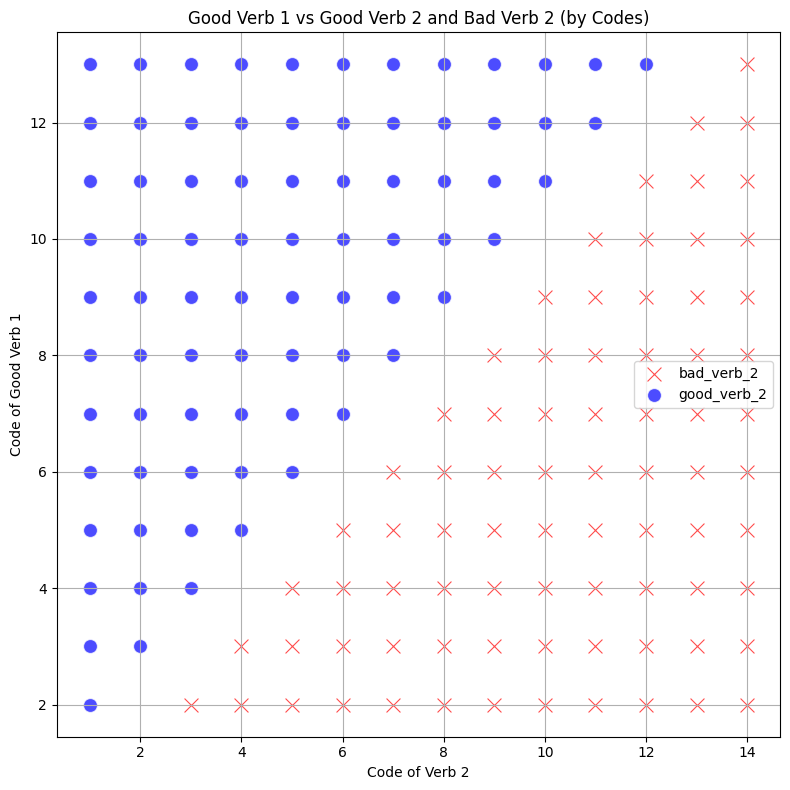

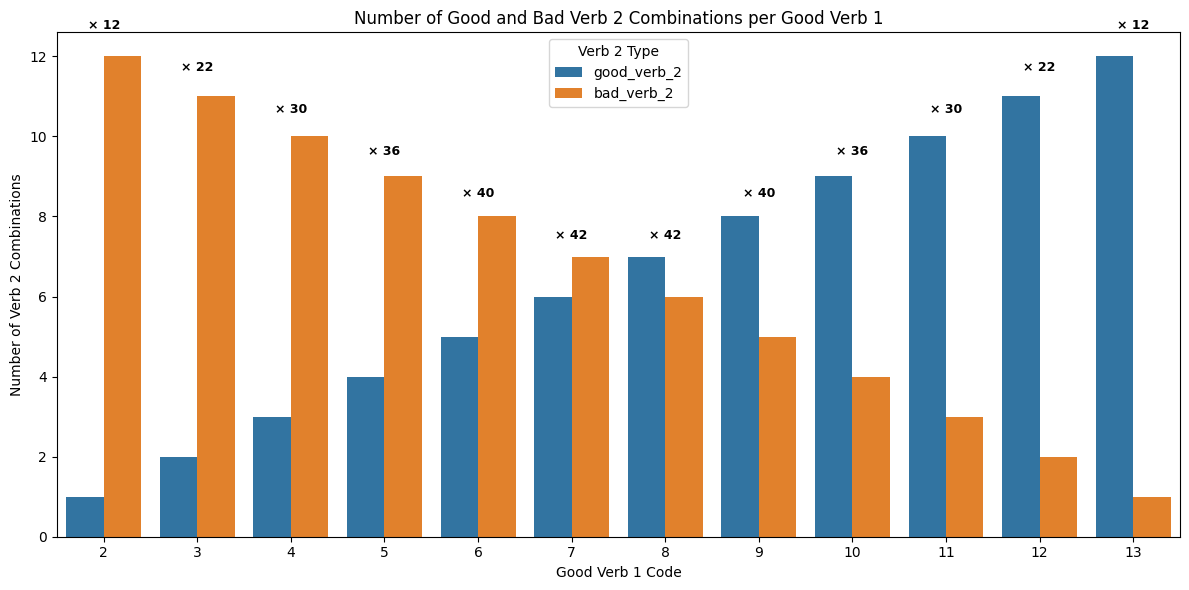

In [ ]:
plt.figure(figsize=(8, 8))

# Plot bad pairs first
sns.scatterplot(
    data=bad_pairs,
    x="bad_code_verb_2",
    y="good_code_verb_1",
    color="red",
    label="bad_verb_2",
    marker="x",
    s=100,
    alpha=0.7,
)

# Plot good pairs on top
sns.scatterplot(
    data=good_pairs,
    x="good_code_verb_2",
    y="good_code_verb_1",
    color="blue",
    label="good_verb_2",
    marker="o",
    s=100,
    alpha=0.7,
)

plt.title("Good Verb 1 vs Good Verb 2 and Bad Verb 2 (by Codes)")
plt.xlabel("Code of Verb 2")
plt.ylabel("Code of Good Verb 1")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Count combinations by verb 1 and type
good_counts = good_pairs.groupby("good_code_verb_1").size().reset_index(name="count")
good_counts["type"] = "good_verb_2"

bad_counts = bad_pairs.groupby("good_code_verb_1").size().reset_index(name="count")
bad_counts["type"] = "bad_verb_2"

counts_df = pd.concat([good_counts, bad_counts])

plt.figure(figsize=(12,6))
ax = sns.barplot(data=counts_df, x="good_code_verb_1", y="count", hue="type")

plt.xlabel("Good Verb 1 Code")
plt.ylabel("Number of Verb 2 Combinations")
plt.title("Number of Good and Bad Verb 2 Combinations per Good Verb 1")
plt.legend(title="Verb 2 Type")

# Compute multiplication factor per good_code_verb_1
good_counts_map = good_counts.set_index("good_code_verb_1")["count"]
bad_counts_map = bad_counts.set_index("good_code_verb_1")["count"]

# Assuming the same set of good_code_verb_1 in both
verb1_codes = sorted(set(good_counts_map.index) & set(bad_counts_map.index))

# Positions of bars on the x-axis (works if good_code_verb_1 are sorted and correspond to x-axis ticks)
x_ticks = range(len(verb1_codes))

for x, gv1 in zip(x_ticks, verb1_codes):
    product = good_counts_map[gv1] * bad_counts_map[gv1]
    # Position text slightly above max bar height at this x-position
    max_height = max(good_counts_map[gv1], bad_counts_map[gv1])
    ax.text(x, max_height * 1.05, f'× {product}', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()




# EXPERIMENT 2

In [ ]:
import pandas as pd
import random


# Hierarchy of restructuring verbs (1 = lowest, 14 = highest)
verbs = [
    "andare a", "cominciare a", "finire di", "provare a", "riuscire a",
    "poter", "dover", "stare per", "continuare a", "smettere di",
    "voler", "tornare a", "tendere a", "soler"
]

conjugated_verbs = [
    "va a", "comincia a", "finisce di", "prova a", "riesce a",
    "può", "deve", "sta per", "continua a", "smette di",
    "vuole", "torna a", "tende a", "suole"
]

# Create a mapping for verb codes
verb_to_code = {verb: i + 1 for i, verb in enumerate(verbs)}
conjugated_verb_to_code = {verb: i + 1 for i, verb in enumerate(conjugated_verbs)}

# DataFrame columns
columns = [
    "pairID", "UID", "simple_LM_method", "context", "sentence_good", "sentence_bad",
    "good_code_verb_1", "good_code_verb_2", "good_distance", "good_verb_1",
    "good_verb_2", "bad_code_verb_1", "bad_code_verb_2", "bad_distance",
    "bad_verb_1", "bad_verb_2", "lexical_subject", "lexical_verb",
    "bad_number_of_words", "good_number_of_words", "frequency_good_verb_1", "frequency_good_verb_2", "frequency_bad_verb_1", "frequency_bad_verb_2"
]

exp2 = []
pair_id_counter = 0
conditions_set_exp2 = set()

# Loop through all possible good verb pairs
for i in range(len(conjugated_verbs)):
    for j in range(len(verbs)):
        code_verb1_good = conjugated_verb_to_code[conjugated_verbs[i]]
        code_verb2_good = verb_to_code[verbs[j]]

        # A good sequence means code_verb1_good > code_verb2_good (higher number comes first)
        if code_verb1_good > code_verb2_good:
            good_verb1 = conjugated_verbs[i]
            good_verb2 = verbs[j]

            # Now, for each good pair, create all possible bad pairs where the first verb is the same
            for k in range(len(verbs)):
                bad_verb1 = conjugated_verbs[i]
                bad_verb2 = verbs[k]
                code_verb1_bad = conjugated_verb_to_code[bad_verb1]
                code_verb2_bad = verb_to_code[bad_verb2]

                # A bad sequence means code_verb1_bad < code_verb2_bad (lower number comes first)
                if code_verb1_bad < code_verb2_bad:
                    # Generate 100 lexical variations for each good-bad pair
                    for lex_var_num in range(1, 101):
                        pair_id_counter += 1

                        # Randomly select lexical items for this minimal pair
                        subj = random.choice(lexicon['[SUBJ]'])
                        verb_inf = random.choice(lexicon['[VERB_INF]'])
                        obj = random.choice(lexicon['[OBJECT]'])
                        cl = 'lo'

                        # Apply 'a' → 'ad' adjustment if verb ends in 'a' and verb_inf starts with vowel
                        good_verb1_adj = adjust_preposition_a(good_verb1, good_verb2.split()[0])
                        good_verb2_adj = adjust_preposition_a(good_verb2, verb_inf)
                        bad_verb1_adj = adjust_preposition_a(bad_verb1, bad_verb2.split()[0])
                        bad_verb2_adj = adjust_preposition_a(bad_verb2, verb_inf)

                        sentence_template_good = f"{subj} {cl} {good_verb1_adj} {good_verb2_adj} {verb_inf}."
                        sentence_template_bad = f"{subj} {cl} {bad_verb1_adj} {bad_verb2_adj} {verb_inf}."

                        # Calculate number of words
                        good_num_words = len(sentence_template_good.split())
                        bad_num_words = len(sentence_template_bad.split())

                        frequency_good_verb_1 = frequencies[verbs[i]]
                        frequency_good_verb_2 = frequencies[verbs[j]]
                        frequency_bad_verb_1 = frequencies[verbs[i]]
                        frequency_bad_verb_2 = frequencies[verbs[k]]

                        exp2.append({
                            "pairID": f"{pair_id_counter:03d}-02-{lex_var_num:03d}",
                            "UID": "pairs_of_restructuring_verbs_contrasting_proclisis_vs_enclisis",
                            "simple_LM_method": True,
                            "context": "",
                            "sentence_good": sentence_template_good,
                            "sentence_bad": sentence_template_bad,
                            "good_code_verb_1": code_verb1_good,
                            "good_code_verb_2": code_verb2_good,
                            "good_distance": abs(code_verb2_good - code_verb1_good),
                            "good_verb_1": good_verb1,
                            "good_verb_2": good_verb2,
                            "bad_code_verb_1": code_verb1_bad,
                            "bad_code_verb_2": code_verb2_bad,
                            "bad_distance": abs(code_verb2_bad - code_verb1_bad),
                            "bad_verb_1": bad_verb1,
                            "bad_verb_2": bad_verb2,
                            "lexical_subject": subj.replace(" ", "_"),
                            "lexical_verb": verb_inf,
                            "bad_number_of_words": bad_num_words,
                            "good_number_of_words": good_num_words,
                            'frequency_good_verb_1': frequency_good_verb_1,
                            'frequency_good_verb_2': frequency_good_verb_2,
                            'frequency_bad_verb_1': frequency_bad_verb_1,
                            'frequency_bad_verb_2': frequency_bad_verb_2,
                        })

                        if lex_var_num == 1:
                          conditions_set_exp2.add((
                              f"{pair_id_counter:03d}",
                              good_verb1, good_verb2,
                              bad_verb1, bad_verb2,
                              abs(code_verb2_good - code_verb1_good),
                              abs(code_verb2_bad - code_verb1_bad),
                              sentence_template_good,
                              sentence_template_bad
                          ))


# Create the DataFrame
exp2_df = pd.DataFrame(exp2, columns=columns)
exp2_df['exp'] = 2

# Display the first few rows of the DataFrame to verify
print(exp2_df.head())

# Display some information about the DataFrame
print("\nDataFrame Info:")
exp2_df.info()

print(f"\nTotal number of rows in the DataFrame: {len(exp2_df)}")

exp2_df.to_excel("exp2.xlsx", index=False)


# Construct the full path
full_path = f"{google_drive_folder_path}/exp2.tsv"

# Save the DataFrame as a TSV file
exp2_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')

print(f"File saved successfully to: {full_path}")

print("\n" + "-" * 160)
print(f"{'id':<5} | {'good verb 1':<15} | {'good verb 2':<15} | {'bad verb 1':<15} | {'bad verb 2':<15} | {'good dist':<10} | {'bad dist':<10} | {'good sentence':<40} | {'bad sentence':<40}")
print("-" * 160)

for cond in sorted(conditions_set_exp2, key=lambda x: int(x[0])):
    id_, gv1, gv2, bv1, bv2, gd, bd, sg, sb = cond
    print(f"{id_:<5} | {gv1:<15} | {gv2:<15} | {bv1:<15} | {bv2:<15} | {gd:<10} | {bd:<10} | {sg:<40} | {sb:<40}")

conditions_columns = [
    "id", "good_verb_1", "good_verb_2", "bad_verb_1", "bad_verb_2",
    "good_distance", "bad_distance", "good_sentence", "bad_sentence"
]

conditions_df_exp2 = pd.DataFrame(sorted(conditions_set_exp2, key=lambda x: int(x[0])), columns=conditions_columns)

xlsx_path = f"{google_drive_folder_path}/experiment_data.xlsx"

# Append new sheet or replace if it exists
with pd.ExcelWriter(xlsx_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    conditions_df_exp2.to_excel(writer, sheet_name='Conditions Exp.2', index=False)

print(f"\nConditions Exp.2 sheet appended successfully to: {xlsx_path}")


       pairID                                                UID  \
0  001-02-001  pairs_of_restructuring_verbs_contrasting_procl...   
1  002-02-002  pairs_of_restructuring_verbs_contrasting_procl...   
2  003-02-003  pairs_of_restructuring_verbs_contrasting_procl...   
3  004-02-004  pairs_of_restructuring_verbs_contrasting_procl...   
4  005-02-005  pairs_of_restructuring_verbs_contrasting_procl...   

   simple_LM_method context                                     sentence_good  \
0              True                 il cestista lo comincia ad andare a fare.   
1              True               il cantante lo comincia ad andare a vedere.   
2              True             il chirurgo lo comincia ad andare ad inviare.   
3              True             il geografo lo comincia ad andare a ritrarre.   
4              True          il paziente lo comincia ad andare a raffigurare.   

                                       sentence_bad  good_code_verb_1  \
0         il cestista lo cominc

# EXPERIMENT 3

In [ ]:
import pandas as pd
import random


# Create a mapping for verb codes
verb_to_code = {verb: i + 1 for i, verb in enumerate(verbs)}
conjugated_verb_to_code = {verb: i + 1 for i, verb in enumerate(conjugated_verbs)}

# DataFrame columns adapted for triplets
columns = [
    "pairID", "UID", "simple_LM_method", "context", "sentence_good", "sentence_bad",
    "good_code_verb_1", "good_code_verb_2", "good_code_verb_3", "good_distance",
    "good_verb_1", "good_verb_2", "good_verb_3",
    "bad_code_verb_1", "bad_code_verb_2", "bad_code_verb_3", "bad_distance",
    "bad_verb_1", "bad_verb_2", "bad_verb_3",
    "lexical_subject", "lexical_verb", "bad_number_of_words", "good_number_of_words"
]

exp3 = []
pair_id_sequential_counter = 0 # This counter will increment for each unique good-bad triplet type

# Loop through all possible good verb triplets
# The first verb is always conjugated, the second and third are always infinitives
for i in range(len(conjugated_verbs)): # Index for good_verb1 (conjugated)
    for j in range(len(verbs)):         # Index for good_verb2 (infinitive)
        for l in range(len(verbs)):     # Index for good_verb3 (infinitive)

            code_v1_good = conjugated_verb_to_code[conjugated_verbs[i]]
            code_v2_good = verb_to_code[verbs[j]]
            code_v3_good = verb_to_code[verbs[l]]

            # A good sequence means code_v1_good > code_v2_good > code_v3_good (higher number comes first in linear order)
            # Also ensure no repeated verbs in good sequences
            if (code_v1_good > code_v2_good and code_v2_good > code_v3_good) and \
               (conjugated_verbs[i] != verbs[j] and conjugated_verbs[i] != verbs[l] and verbs[j] != verbs[l]):
                good_verb1 = conjugated_verbs[i]
                good_verb2 = verbs[j]
                good_verb3 = verbs[l]

                # Now, for each good triplet, create all possible bad triplets
                # where the first verb (bad_verb1) is the same as good_verb1
                for k_bad_v2 in range(len(verbs)): # Index for bad_verb2 (infinitive)
                    for m_bad_v3 in range(len(verbs)): # Index for bad_verb3 (infinitive)

                        bad_verb1 = good_verb1 # The first verb remains constant
                        bad_verb2 = verbs[k_bad_v2]
                        bad_verb3 = verbs[m_bad_v3]

                        code_v1_bad = code_v1_good # Code for the first bad verb is same as good_verb1
                        code_v2_bad = verb_to_code[bad_verb2]
                        code_v3_bad = verb_to_code[bad_verb3]

                        # A bad sequence is any combination starting with bad_verb1 that is NOT a good sequence
                        # AND ensures no repeated verbs within the bad triplet
                        if (not (code_v1_bad > code_v2_bad and code_v2_bad > code_v3_bad)) and \
                           (bad_verb1 != bad_verb2 and bad_verb1 != bad_verb3 and bad_verb2 != bad_verb3):
                            # This is a valid bad sequence that contrasts with the current good sequence

                            pair_id_sequential_counter += 1 # Increment for each unique good-bad contrast type

                            # Generate 100 lexical variations for each unique good-bad triplet contrast
                            for lex_var_num in range(1, 101):

                                # Randomly select lexical items for this minimal pair (shared across good/bad sentences)
                                subj = random.choice(lexicon['[SUBJ]'])
                                verb_inf = random.choice(lexicon['[VERB_INF]'])
                                obj = random.choice(lexicon['[OBJECT]'])

                                # Apply 'a' → 'ad' adjustment if needed for good sequence
                                good_verb1_adj = adjust_preposition_a(good_verb1, good_verb2.split()[0])
                                good_verb2_adj = adjust_preposition_a(good_verb2, good_verb3.split()[0])
                                good_verb3_adj = adjust_preposition_a(good_verb3, verb_inf)

                                # Apply 'a' → 'ad' adjustment if needed for bad sequence
                                bad_verb1_adj = adjust_preposition_a(bad_verb1, bad_verb2.split()[0])
                                bad_verb2_adj = adjust_preposition_a(bad_verb2, bad_verb3.split()[0])
                                bad_verb3_adj = adjust_preposition_a(bad_verb3, verb_inf)

                                # Construct good and bad sentences
                                sentence_template_good = f"{subj} {good_verb1_adj} {good_verb2_adj} {good_verb3_adj} {verb_inf} {obj}."
                                sentence_template_bad = f"{subj} {bad_verb1_adj} {bad_verb2_adj} {bad_verb3_adj} {verb_inf} {obj}."


                                # Calculate number of words for both sentences
                                good_num_words = len(sentence_template_good.split())
                                bad_num_words = len(sentence_template_bad.split())

                                # Append the row data to the list
                                exp3.append({
                                    "pairID": f"{pair_id_sequential_counter:03d}-03-{lex_var_num:03d}",
                                    "UID": "sequence_triplets_no_clitics",
                                    "simple_LM_method": True,
                                    "context": "",
                                    "sentence_good": sentence_template_good,
                                    "sentence_bad": sentence_template_bad,
                                    "good_code_verb_1": code_v1_good,
                                    "good_code_verb_2": code_v2_good,
                                    "good_code_verb_3": code_v3_good,
                                    "good_distance": abs(code_v1_good - code_v2_good) + abs(code_v2_good - code_v3_good),
                                    "good_verb_1": good_verb1,
                                    "good_verb_2": good_verb2,
                                    "good_verb_3": good_verb3,
                                    "bad_code_verb_1": code_v1_bad,
                                    "bad_code_verb_2": code_v2_bad,
                                    "bad_code_verb_3": code_v3_bad,
                                    "bad_distance": abs(code_v1_bad - code_v2_bad) + abs(code_v2_bad - code_v3_bad),
                                    "bad_verb_1": bad_verb1,
                                    "bad_verb_2": bad_verb2,
                                    "bad_verb_3": bad_verb3,
                                    "lexical_subject": subj.replace(" ", "_"),
                                    "lexical_verb": verb_inf,
                                    "bad_number_of_words": bad_num_words,
                                    "good_number_of_words": good_num_words,
                                })

# Create the DataFrame
exp3_df = pd.DataFrame(exp3, columns=columns)
exp3_df['exp'] = 3

# Display the first few rows of the DataFrame to verify
print("First 5 rows of the generated DataFrame:")
print(exp3_df.head())

# Display some information about the DataFrame
print("\nDataFrame Info:")
exp3_df.info()

print(f"\nTotal number of rows in the DataFrame: {len(exp3_df)}")

# Construct the full path
full_path = f"{google_drive_folder_path}/exp3.tsv"

# Save the DataFrame as a TSV file
exp3_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')

print(f"File saved successfully to: {full_path}")

KeyboardInterrupt: 

# EXPERIMENT 4

In [ ]:
import pandas as pd
import random


# Create a mapping for verb codes
verb_to_code = {verb: i + 1 for i, verb in enumerate(verbs)}
conjugated_verb_to_code = {verb: i + 1 for i, verb in enumerate(conjugated_verbs)}

# DataFrame columns adapted for triplets
columns = [
    "pairID", "UID", "simple_LM_method", "context", "sentence_good", "sentence_bad",
    "good_code_verb_1", "good_code_verb_2", "good_code_verb_3", "good_distance",
    "good_verb_1", "good_verb_2", "good_verb_3",
    "bad_code_verb_1", "bad_code_verb_2", "bad_code_verb_3", "bad_distance",
    "bad_verb_1", "bad_verb_2", "bad_verb_3",
    "lexical_subject", "lexical_verb", "bad_number_of_words", "good_number_of_words"
]

exp4 = []
pair_id_sequential_counter = 0 # This counter will increment for each unique good-bad triplet type

# Loop through all possible good verb triplets
# The first verb is always conjugated, the second and third are always infinitives
for i in range(len(conjugated_verbs)): # Index for good_verb1 (conjugated)
    for j in range(len(verbs)):         # Index for good_verb2 (infinitive)
        for l in range(len(verbs)):     # Index for good_verb3 (infinitive)

            code_v1_good = conjugated_verb_to_code[conjugated_verbs[i]]
            code_v2_good = verb_to_code[verbs[j]]
            code_v3_good = verb_to_code[verbs[l]]

            # A good sequence means code_v1_good > code_v2_good > code_v3_good (higher number comes first in linear order)
            # Also ensure no repeated verbs in good sequences
            if (code_v1_good > code_v2_good and code_v2_good > code_v3_good) and \
               (conjugated_verbs[i] != verbs[j] and conjugated_verbs[i] != verbs[l] and verbs[j] != verbs[l]):
                good_verb1 = conjugated_verbs[i]
                good_verb2 = verbs[j]
                good_verb3 = verbs[l]

                # Now, for each good triplet, create all possible bad triplets
                # where the first verb (bad_verb1) is the same as good_verb1
                for k_bad_v2 in range(len(verbs)): # Index for bad_verb2 (infinitive)
                    for m_bad_v3 in range(len(verbs)): # Index for bad_verb3 (infinitive)

                        bad_verb1 = good_verb1 # The first verb remains constant
                        bad_verb2 = verbs[k_bad_v2]
                        bad_verb3 = verbs[m_bad_v3]

                        code_v1_bad = code_v1_good # Code for the first bad verb is same as good_verb1
                        code_v2_bad = verb_to_code[bad_verb2]
                        code_v3_bad = verb_to_code[bad_verb3]

                        # A bad sequence is any combination starting with bad_verb1 that is NOT a good sequence
                        # AND ensures no repeated verbs within the bad triplet
                        if (not (code_v1_bad > code_v2_bad and code_v2_bad > code_v3_bad)) and \
                           (bad_verb1 != bad_verb2 and bad_verb1 != bad_verb3 and bad_verb2 != bad_verb3):
                            # This is a valid bad sequence that contrasts with the current good sequence

                            pair_id_sequential_counter += 1 # Increment for each unique good-bad contrast type

                            # Generate 100 lexical variations for each unique good-bad triplet contrast
                            for lex_var_num in range(1, 101):

                                # Randomly select lexical items for this minimal pair (shared across good/bad sentences)
                                subj = random.choice(lexicon['[SUBJ]'])
                                verb_inf = random.choice(lexicon['[VERB_INF]'])
                                obj = random.choice(lexicon['[OBJECT]'])
                                cl = 'lo'

                                # Apply 'a' → 'ad' adjustment if needed for good sequence
                                good_verb1_adj = adjust_preposition_a(good_verb1, good_verb2.split()[0])
                                good_verb2_adj = adjust_preposition_a(good_verb2, good_verb3.split()[0])
                                good_verb3_adj = adjust_preposition_a(good_verb3, verb_inf)

                                # Apply 'a' → 'ad' adjustment if needed for bad sequence
                                bad_verb1_adj = adjust_preposition_a(bad_verb1, bad_verb2.split()[0])
                                bad_verb2_adj = adjust_preposition_a(bad_verb2, bad_verb3.split()[0])
                                bad_verb3_adj = adjust_preposition_a(bad_verb3, verb_inf)

                                # Construct good and bad sentences
                                sentence_template_good = f"{subj} {cl} {good_verb1_adj} {good_verb2_adj} {good_verb3_adj} {verb_inf}."
                                sentence_template_bad = f"{subj} {cl} {bad_verb1_adj} {bad_verb2_adj} {bad_verb3_adj} {verb_inf}."


                                # Calculate number of words for both sentences
                                good_num_words = len(sentence_template_good.split())
                                bad_num_words = len(sentence_template_bad.split())

                                # Append the row data to the list
                                exp4.append({
                                    "pairID": f"{pair_id_sequential_counter:03d}-04-{lex_var_num:03d}",
                                    "UID": "sequence_triplets_with_clitics",
                                    "simple_LM_method": True,
                                    "context": "",
                                    "sentence_good": sentence_template_good,
                                    "sentence_bad": sentence_template_bad,
                                    "good_code_verb_1": code_v1_good,
                                    "good_code_verb_2": code_v2_good,
                                    "good_code_verb_3": code_v3_good,
                                    "good_distance": abs(code_v1_good - code_v2_good) + abs(code_v2_good - code_v3_good),
                                    "good_verb_1": good_verb1,
                                    "good_verb_2": good_verb2,
                                    "good_verb_3": good_verb3,
                                    "bad_code_verb_1": code_v1_bad,
                                    "bad_code_verb_2": code_v2_bad,
                                    "bad_code_verb_3": code_v3_bad,
                                    "bad_distance": abs(code_v1_bad - code_v2_bad) + abs(code_v2_bad - code_v3_bad),
                                    "bad_verb_1": bad_verb1,
                                    "bad_verb_2": bad_verb2,
                                    "bad_verb_3": bad_verb3,
                                    "lexical_subject": subj.replace(" ", "_"),
                                    "lexical_verb": verb_inf,
                                    "bad_number_of_words": bad_num_words,
                                    "good_number_of_words": good_num_words,
                                })

# Create the DataFrame
exp4_df = pd.DataFrame(exp4, columns=columns)
exp4_df['exp'] = 4

# Display the first few rows of the DataFrame to verify
print("First 5 rows of the generated DataFrame:")
print(exp4_df.head())

# Display some information about the DataFrame
print("\nDataFrame Info:")
exp4_df.info()

print(f"\nTotal number of rows in the DataFrame: {len(exp4_df)}")

# Construct the full path
full_path = f"{google_drive_folder_path}/exp4.tsv"

# Save the DataFrame as a TSV file
exp4_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')

print(f"File saved successfully to: {full_path}")

First 5 rows of the generated DataFrame:
       pairID                             UID  simple_LM_method context  \
0  001-04-001  sequence_triplets_with_clitics              True           
1  001-04-002  sequence_triplets_with_clitics              True           
2  001-04-003  sequence_triplets_with_clitics              True           
3  001-04-004  sequence_triplets_with_clitics              True           
4  001-04-005  sequence_triplets_with_clitics              True           

                                       sentence_good  \
0  il medico lo finisce di cominciare ad andare a...   
1  il cestista lo finisce di cominciare ad andare...   
2  il comico lo finisce di cominciare ad andare a...   
3  il comico lo finisce di cominciare ad andare a...   
4  il critico lo finisce di cominciare ad andare ...   

                                        sentence_bad  good_code_verb_1  \
0  il medico lo finisce di andare a cominciare a ...                 3   
1  il cestista lo finis

# Experiment 5

In [ ]:
import pandas as pd
import random


# 3. Define add_enclitic_lo function
def add_enclitic_lo(verb_phrase):
    """
    Transforms an Italian verb infinitive phrase (e.g., 'amare', 'dire di')
    into its enclitic form by attaching 'lo' at the end of the main verb.
    Handles verbs ending in -re by removing it before attaching 'lo'.
    For example: 'amare' -> 'amarlo', 'dire di' -> 'dirlo di'.
    """
    # Split the phrase to isolate the main verb and any following prepositions/particles
    parts = verb_phrase.split()
    verb = parts[0] # The main verb (e.g., 'dire' from 'dire di')
    rest = " ".join(parts[1:]) if len(parts) > 1 else "" # Any remaining parts (e.g., 'di')

    # Apply the rule: if the verb ends in '-re', remove '-re' before adding 'lo'
    if verb.endswith("re"):
        base = verb[:-1] # Remove 'e' from '-re' ending (e.g., 'ama' from 'amare')
        enclitic_form = base + "lo" # Attach 'lo' (e.g., 'amalo')
    else:
        # Fallback for verbs not ending in -re (e.g., if verb is already truncated or irregular)
        # This simply adds 'lo' directly. For standard Italian infinitives, the -re rule is primary.
        enclitic_form = verb + "lo"

    # Reassemble the enclitic verb form with any original trailing parts
    return f"{enclitic_form} {rest}".strip() # .strip() removes trailing space if 'rest' is empty

# 3. Setup columns
columns = [
    "pairID", "UID", "simple_LM_method", "context", "sentence_good", "sentence_bad",
    "good_code_verb_1", "good_code_verb_2", "good_distance", "good_verb_1", "good_verb_2",
    "bad_code_verb_1", "bad_code_verb_2", "bad_distance", "bad_verb_1", "bad_verb_2",
    "lexical_subject", "lexical_verb", "bad_number_of_words", "good_number_of_words",
    "frequency_good_verb_1", "frequency_good_verb_2"
]

exp5 = []
conditions_set_exp5 = set()

UID_CONSTANT = 'pairs_in_the_restructuring_control_order_with_enclisis_and_proclisis'
SIMPLE_LM_METHOD_CONSTANT = True
CONTEXT_CONSTANT = ""
DISTANCE_CONSTANT = ""
NUM_LEXICAL_VARIATIONS = 100

# 4. Generate rows
for v1_idx, current_verb1_conjugated in enumerate(conjugated_verbs):
    for v2_idx, current_verb2_infinitive in enumerate(control_verbs):
        condition_number = (v1_idx * len(control_verbs)) + v2_idx + 1
        for i in range(NUM_LEXICAL_VARIATIONS):
            selected_subj = random.choice(lexicon['[SUBJ]'])
            selected_verb_inf = random.choice(lexicon['[VERB_INF]'])
            selected_obj = random.choice(lexicon['[OBJECT]'])

            verb_inf_enclitic = add_enclitic_lo(selected_verb_inf)

            adj_verb1_good = adjust_preposition_a(current_verb1_conjugated, current_verb2_infinitive.split()[0])
            adj_verb2_good = adjust_preposition_a(current_verb2_infinitive, verb_inf_enclitic.split()[0])
            adj_verb1_bad = adjust_preposition_a(current_verb1_conjugated, current_verb2_infinitive.split()[0])
            adj_verb2_bad = adjust_preposition_a(current_verb2_infinitive, selected_verb_inf.split()[0])

            sentence_good = f"{selected_subj} {adj_verb1_good} {adj_verb2_good} {verb_inf_enclitic}."
            sentence_bad = f"{selected_subj} lo {adj_verb1_bad} {adj_verb2_bad} {selected_verb_inf}."

            good_sentence_word_count = len(sentence_good.split())
            bad_sentence_word_count = len(sentence_bad.split())

            frequency_v1 = frequencies_conjugated.get(current_verb1_conjugated, 0)
            frequency_v2 = frequencies.get(current_verb2_infinitive, 0)

            row = {
                "pairID": f"{condition_number:02d}-05-{i+1:03d}",
                "UID": UID_CONSTANT,
                "simple_LM_method": SIMPLE_LM_METHOD_CONSTANT,
                "context": CONTEXT_CONSTANT,
                "sentence_good": sentence_good,
                "sentence_bad": sentence_bad,
                "good_code_verb_1": v1_idx + 1,
                "good_code_verb_2": v2_idx + 1,
                "good_distance": DISTANCE_CONSTANT,
                "good_verb_1": current_verb1_conjugated,
                "good_verb_2": current_verb2_infinitive,
                "bad_code_verb_1": v1_idx + 1,
                "bad_code_verb_2": v2_idx + 1,
                "bad_distance": DISTANCE_CONSTANT,
                "bad_verb_1": current_verb1_conjugated,
                "bad_verb_2": current_verb2_infinitive,
                "lexical_subject": selected_subj.replace(' ', '_'),
                "lexical_verb": selected_verb_inf,
                "bad_number_of_words": good_sentence_word_count,
                "good_number_of_words": bad_sentence_word_count,
                "frequency_verb_1": frequency_v1,
                "frequency_verb_2": frequency_v2
            }
            exp5.append(row)

            if i == 0:
                conditions_set_exp5.add((
                    f"{condition_number:02d}",
                    current_verb1_conjugated, current_verb2_infinitive,
                    current_verb1_conjugated, current_verb2_infinitive,
                    DISTANCE_CONSTANT, DISTANCE_CONSTANT,
                    sentence_good, sentence_bad
                ))

# 5. Create dataframe and save
exp5_df = pd.DataFrame(exp5, columns=columns)
exp5_df['exp'] = 5

print(exp5_df.head())
print(f"\nTotal number of rows in the DataFrame: {len(exp5_df)}")

# TSV
full_path = f"{google_drive_folder_path}/exp5.tsv"
exp5_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')
print(f"File saved successfully to: {full_path}")

# 3. Setup columns
columns = [
    "pairID", "UID", "simple_LM_method", "context", "sentence_good", "sentence_bad",
    "good_code_verb_1", "good_code_verb_2", "good_distance", "good_verb_1", "good_verb_2",
    "bad_code_verb_1", "bad_code_verb_2", "bad_distance", "bad_verb_1", "bad_verb_2",
    "lexical_subject", "lexical_verb", "bad_number_of_words", "good_number_of_words",
    "frequency_verb_1", "frequency_verb_2"
]

exp5 = []
conditions_set_exp5 = set()

UID_CONSTANT = 'pairs_in_the_restructuring_control_order_with_enclisis_and_proclisis'
SIMPLE_LM_METHOD_CONSTANT = True
CONTEXT_CONSTANT = ""
DISTANCE_CONSTANT = ""
NUM_LEXICAL_VARIATIONS = 100

# 4. Generate rows
for v1_idx, current_verb1_conjugated in enumerate(conjugated_verbs):
    for v2_idx, current_verb2_infinitive in enumerate(control_verbs):
        condition_number = (v1_idx * len(control_verbs)) + v2_idx + 1
        for i in range(NUM_LEXICAL_VARIATIONS):
            selected_subj = random.choice(lexicon['[SUBJ]'])
            selected_verb_inf = random.choice(lexicon['[VERB_INF]'])
            selected_obj = random.choice(lexicon['[OBJECT]'])

            verb_inf_enclitic = add_enclitic_lo(selected_verb_inf)

            adj_verb1_good = adjust_preposition_a(current_verb1_conjugated, current_verb2_infinitive.split()[0])
            adj_verb2_good = adjust_preposition_a(current_verb2_infinitive, verb_inf_enclitic.split()[0])
            adj_verb1_bad = adjust_preposition_a(current_verb1_conjugated, current_verb2_infinitive.split()[0])
            adj_verb2_bad = adjust_preposition_a(current_verb2_infinitive, selected_verb_inf.split()[0])

            sentence_good = f"{selected_subj} {adj_verb1_good} {adj_verb2_good} {verb_inf_enclitic}."
            sentence_bad = f"{selected_subj} lo {adj_verb1_bad} {adj_verb2_bad} {selected_verb_inf}."

            good_sentence_word_count = len(sentence_good.split())
            bad_sentence_word_count = len(sentence_bad.split())

            frequency_v1 = frequencies_conjugated.get(current_verb1_conjugated, 0)
            frequency_v2 = frequencies.get(current_verb2_infinitive, 0)

            row = {
                "pairID": f"{condition_number:02d}-05-{i+1:03d}",
                "UID": UID_CONSTANT,
                "simple_LM_method": SIMPLE_LM_METHOD_CONSTANT,
                "context": CONTEXT_CONSTANT,
                "sentence_good": sentence_good,
                "sentence_bad": sentence_bad,
                "good_code_verb_1": v1_idx + 1,
                "good_code_verb_2": v2_idx + 1,
                "good_distance": DISTANCE_CONSTANT,
                "good_verb_1": current_verb1_conjugated,
                "good_verb_2": current_verb2_infinitive,
                "bad_code_verb_1": v1_idx + 1,
                "bad_code_verb_2": v2_idx + 1,
                "bad_distance": DISTANCE_CONSTANT,
                "bad_verb_1": current_verb1_conjugated,
                "bad_verb_2": current_verb2_infinitive,
                "lexical_subject": selected_subj.replace(' ', '_'),
                "lexical_verb": selected_verb_inf,
                "bad_number_of_words": good_sentence_word_count,
                "good_number_of_words": bad_sentence_word_count,
                "frequency_verb_1": frequency_v1,
                "frequency_verb_2": frequency_v2
            }
            exp5.append(row)

            if i == 0:
                conditions_set_exp5.add((
                    f"{condition_number:02d}",
                    current_verb1_conjugated, current_verb2_infinitive,
                    current_verb1_conjugated, current_verb2_infinitive,
                    DISTANCE_CONSTANT, DISTANCE_CONSTANT,
                    sentence_good, sentence_bad
                ))

# 5. Create dataframe and save
exp5_df = pd.DataFrame(exp5, columns=columns)
exp5_df['exp'] = 5

print(exp5_df.head())
print(f"\nTotal number of rows in the DataFrame: {len(exp5_df)}")

# TSV
full_path = f"{google_drive_folder_path}/exp5.tsv"
exp5_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')
print(f"File saved successfully to: {full_path}")

# 6. Print conditions
print("\n" + "-" * 160)
print(f"{'id':<5} | {'good verb 1':<15} | {'good verb 2':<15} | {'bad verb 1':<15} | {'bad verb 2':<15} | {'good dist':<10} | {'bad dist':<10} | {'good sentence':<40} | {'bad sentence':<40}")
print("-" * 160)
for cond in sorted(conditions_set_exp5, key=lambda x: int(x[0])):
    id_, gv1, gv2, bv1, bv2, gd, bd, sg, sb = cond
    print(f"{id_:<5} | {gv1:<15} | {gv2:<15} | {bv1:<15} | {bv2:<15} | {gd:<10} | {bd:<10} | {sg:<40} | {sb:<40}")

# 7. Save conditions to Excel sheet
conditions_columns = [
    "id", "good_verb_1", "good_verb_2", "bad_verb_1", "bad_verb_2",
    "good_distance", "bad_distance", "good_sentence", "bad_sentence"
]
conditions_df_exp5 = pd.DataFrame(sorted(conditions_set_exp5, key=lambda x: int(x[0])), columns=conditions_columns)

xlsx_path = f"{google_drive_folder_path}/experiment_data.xlsx"
with pd.ExcelWriter(xlsx_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    conditions_df_exp5.to_excel(writer, sheet_name='Conditions Exp.5', index=False)

print(f"\nConditions Exp.5 sheet appended successfully to: {xlsx_path}")

      pairID                                                UID  \
0  01-05-001  pairs_in_the_restructuring_control_order_with_...   
1  01-05-002  pairs_in_the_restructuring_control_order_with_...   
2  01-05-003  pairs_in_the_restructuring_control_order_with_...   
3  01-05-004  pairs_in_the_restructuring_control_order_with_...   
4  01-05-005  pairs_in_the_restructuring_control_order_with_...   

   simple_LM_method context                                sentence_good  \
0              True               il gioielliere va a correre a crearlo.   
1              True                   il dottore va a correre a crearlo.   
2              True                  l'operaio va a correre a lucidarlo.   
3              True           il direttore va a correre a disinfettarlo.   
4              True          il parrucchiere va a correre ad inventarlo.   

                                    sentence_bad  good_code_verb_1  \
0       il gioielliere lo va a correre a creare.                 1   


# Experiment 6

In [ ]:
import pandas as pd
import random




# 4. Define DataFrame Columns
columns = [
    "pairID", "UID", "simple_LM_method", "context", "sentence_good", "sentence_bad",
    "good_code_verb_1", "good_code_verb_2", "good_distance", "good_verb_1", "good_verb_2",
    "bad_code_verb_1", "bad_code_verb_2", "bad_distance", "bad_verb_1", "bad_verb_2",
    "lexical_subject", "lexical_verb", "bad_number_of_words", "good_number_of_words"
]

# This list will store dictionaries, each representing a row in the DataFrame
exp6 = []
columns += ["frequency_good_verb_1", "frequency_good_verb_2"]

# Initialize condition set
conditions_set_exp6 = set()

# Constants for DataFrame columns that have fixed values across all rows
UID_CONSTANT = 'pairs_in_the_control_restructuring_order_with_enclisis_and_proclisis'
SIMPLE_LM_METHOD_CONSTANT = True
CONTEXT_CONSTANT = ""
DISTANCE_CONSTANT = ""
NUM_LEXICAL_VARIATIONS = 100 # Number of distinct lexical variations for each verb pair

# 5. Generate Pairs and Populate DataFrame
# The outer loop iterates through the conjugated restructuring verbs (current_verb1)
for v1_idx, current_verb1_conjugated in enumerate(control_conjugated):
    for v2_idx, current_verb2_infinitive in enumerate(verbs):
        condition_number = (v1_idx * len(control_verbs)) + v2_idx + 1

        for i in range(NUM_LEXICAL_VARIATIONS):
            selected_subj = random.choice(lexicon['[SUBJ]'])
            selected_verb_inf = random.choice(lexicon['[VERB_INF]'])
            selected_obj = random.choice(lexicon['[OBJECT]'])

            verb_inf_enclitic = add_enclitic_lo(selected_verb_inf)

            adj_verb1_good = adjust_preposition_a(current_verb1_conjugated, current_verb2_infinitive.split()[0])
            adj_verb2_good = adjust_preposition_a(current_verb2_infinitive, verb_inf_enclitic.split()[0])
            adj_verb1_bad = adjust_preposition_a(current_verb1_conjugated, current_verb2_infinitive.split()[0])
            adj_verb2_bad = adjust_preposition_a(current_verb2_infinitive, selected_verb_inf.split()[0])

            sentence_good = f"{selected_subj} {adj_verb1_good} {adj_verb2_good} {verb_inf_enclitic}."
            sentence_bad = f"{selected_subj} lo {adj_verb1_bad} {adj_verb2_bad} {selected_verb_inf}."

            good_sentence_word_count = len(sentence_good.split())
            bad_sentence_word_count = len(sentence_bad.split())

            frequency_v1 = frequencies_conjugated.get(current_verb1_conjugated, 0)
            frequency_v2 = frequencies.get(current_verb2_infinitive, 0)

            row = {
                "pairID": f"{condition_number:02d}-06-{i+1:03d}",
                "UID": UID_CONSTANT,
                "simple_LM_method": SIMPLE_LM_METHOD_CONSTANT,
                "context": CONTEXT_CONSTANT,
                "sentence_good": sentence_good,
                "sentence_bad": sentence_bad,
                "good_code_verb_1": v1_idx + 1,
                "good_code_verb_2": v2_idx + 1,
                "good_distance": DISTANCE_CONSTANT,
                "good_verb_1": current_verb1_conjugated,
                "good_verb_2": current_verb2_infinitive,
                "bad_code_verb_1": v1_idx + 1,
                "bad_code_verb_2": v2_idx + 1,
                "bad_distance": DISTANCE_CONSTANT,
                "bad_verb_1": current_verb1_conjugated,
                "bad_verb_2": current_verb2_infinitive,
                "lexical_subject": selected_subj.replace(' ', '_'),
                "lexical_verb": selected_verb_inf,
                "bad_number_of_words": good_sentence_word_count,
                "good_number_of_words": bad_sentence_word_count,
                "frequency_verb_1": frequency_v1,
                "frequency_verb_2": frequency_v2
            }
            exp6.append(row)

            if i == 0:
                conditions_set_exp6.add((
                    f"{condition_number:02d}",
                    current_verb1_conjugated,
                    current_verb2_infinitive,
                    current_verb1_conjugated,
                    current_verb2_infinitive,
                    sentence_good,
                    sentence_bad
                ))

# Create final DataFrame
exp6_df = pd.DataFrame(exp6, columns=columns)
exp6_df['exp'] = 6

# Save as TSV
full_path = f"{google_drive_folder_path}/exp6.tsv"
exp6_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')
print(f"File saved successfully to: {full_path}")

# -----------------------------------------
# Print and Save Condition Table
# -----------------------------------------
print("\n" + "-" * 160)
print(f"{'id':<5} | {'good verb 1':<15} | {'good verb 2':<15} | {'bad verb 1':<15} | {'bad verb 2':<15} | {'good sentence':<40} | {'bad sentence':<40}")
print("-" * 160)

for cond in sorted(conditions_set_exp6, key=lambda x: int(x[0])):
    id_, gv1, gv2, bv1, bv2, sg, sb = cond
    print(f"{id_:<5} | {gv1:<15} | {gv2:<15} | {bv1:<15} | {bv2:<15} | {sg:<40} | {sb:<40}")

# Create DataFrame from condition set
conditions_columns_exp6 = [
    "id", "good_verb_1", "good_verb_2", "bad_verb_1", "bad_verb_2",
    "good_sentence", "bad_sentence"
]
conditions_df_exp6 = pd.DataFrame(sorted(conditions_set_exp6, key=lambda x: int(x[0])), columns=conditions_columns_exp6)

# Save to xlsx
xlsx_path = f"{google_drive_folder_path}/experiment_data.xlsx"
with pd.ExcelWriter(xlsx_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    conditions_df_exp6.to_excel(writer, sheet_name='Conditions Exp. 6', index=False)

print(f"\nConditions Exp. 6 sheet appended successfully to: {xlsx_path}")

File saved successfully to: /content/drive/MyDrive/LLM restructuring/experiments/exp6.tsv

----------------------------------------------------------------------------------------------------------------------------------------------------------------
id    | good verb 1     | good verb 2     | bad verb 1      | bad verb 2      | good sentence                            | bad sentence                            
----------------------------------------------------------------------------------------------------------------------------------------------------------------
01    | corre a         | andare a        | corre a         | andare a        | il comico corre ad andare a dipingerlo.  | il comico lo corre ad andare a dipingere.
02    | corre a         | cominciare a    | corre a         | cominciare a    | l'impiegato corre a cominciare ad approvarlo. | l'impiegato lo corre a cominciare ad approvare.
03    | corre a         | finire di       | corre a         | finire di       | il

# Experiment 7

In [ ]:
# Initialize an empty list to store row data
exp7 = []
conditions_set_exp7 = set()
global_condition_id_counter = 0

# Loop through pseudo verbs and restructuring verbs to create pairs
for idx_pseudo, current_verb1_conjugated in enumerate(pseudo_conjugated):
    code_verb1 = idx_pseudo + 1
    current_verb1_infinitive = pseudo_verbs[idx_pseudo]

    for idx_restructuring, current_verb2_conjugated in enumerate(verbs):
        code_verb2 = idx_restructuring + 1
        current_verb2_infinitive = verbs[idx_restructuring]

        global_condition_id_counter += 1

        for i in range(1, 101):
            selected_subj_raw = random.choice(lexicon['[SUBJ]'])
            selected_subj = selected_subj_raw.replace(" ", "_")
            selected_verb_inf = random.choice(lexicon['[VERB_INF]'])
            selected_verb_inf_cl = add_enclitic_lo(selected_verb_inf)

            adj_verb1 = adjust_preposition_a(current_verb1_conjugated, current_verb2_infinitive.split()[0])
            adj_verb2 = adjust_preposition_a(current_verb2_infinitive, selected_verb_inf_cl.split()[0])
            adj_verb2_bad = adjust_preposition_a(current_verb2_infinitive, selected_verb_inf.split()[0])

            sentence_good_text = f"{selected_subj_raw} {adj_verb1} {adj_verb2} {selected_verb_inf_cl}."
            sentence_bad_text = f"{selected_subj_raw} lo {adj_verb1} {adj_verb2_bad} {selected_verb_inf}."

            good_num_words = len(sentence_good_text.split())
            bad_num_words = len(sentence_bad_text.split())

            frequency_v2 = frequencies.get(current_verb2_infinitive, 0)

            pair_id_suffix = str(i).zfill(3)
            pair_id = f"{global_condition_id_counter}-07-{pair_id_suffix}"

            exp7.append({
                "pairID": pair_id,
                "UID": "pairs_pseudoverbs_restructuring_with_enclitic_and_proclitic_options",
                "simple_LM_method": True,
                "context": "",
                "sentence_good": sentence_good_text,
                "sentence_bad": sentence_bad_text,
                "good_code_verb_1": code_verb1,
                "good_code_verb_2": code_verb2,
                "good_distance": "",
                "good_verb_1": current_verb1_infinitive,
                "good_verb_2": current_verb2_infinitive,
                "bad_code_verb_1": code_verb1,
                "bad_code_verb_2": code_verb2,
                "bad_distance": "",
                "bad_verb_1": current_verb1_infinitive,
                "bad_verb_2": current_verb2_infinitive,
                "lexical_subject": selected_subj,
                "lexical_verb": selected_verb_inf,
                "bad_number_of_words": bad_num_words,
                "good_number_of_words": good_num_words,
                "frequency_good_verb_2": frequency_v2
            })

            if i == 1:
                conditions_set_exp7.add((
                    f"{global_condition_id_counter:03d}",
                    current_verb1_infinitive,
                    current_verb2_infinitive,
                    current_verb1_infinitive,
                    current_verb2_infinitive,
                    sentence_good_text,
                    sentence_bad_text
                ))

# Create the DataFrame
exp7_df = pd.DataFrame(exp7)
exp7_df['exp'] = 7

print(exp7_df.head())
print(exp7_df.shape)
print(exp7_df.info())
print(f"\nTotal number of rows in the DataFrame: {len(exp7_df)}")

# Save as TSV
full_path = f"{google_drive_folder_path}/exp7.tsv"
exp7_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')
print(f"File saved successfully to: {full_path}")

# -----------------------------------------
# Print and Save Condition Table
# -----------------------------------------
print("\n" + "-" * 160)
print(f"{'id':<5} | {'good verb 1':<15} | {'good verb 2':<15} | {'bad verb 1':<15} | {'bad verb 2':<15} | {'good sentence':<40} | {'bad sentence':<40}")
print("-" * 160)

for cond in sorted(conditions_set_exp7, key=lambda x: int(x[0])):
    id_, gv1, gv2, bv1, bv2, sg, sb = cond
    print(f"{id_:<5} | {gv1:<15} | {gv2:<15} | {bv1:<15} | {bv2:<15} | {sg:<40} | {sb:<40}")

# Save condition set to xlsx
conditions_columns_exp7 = [
    "id", "good_verb_1", "good_verb_2", "bad_verb_1", "bad_verb_2",
    "good_sentence", "bad_sentence"
]
conditions_df_exp7 = pd.DataFrame(sorted(conditions_set_exp7, key=lambda x: int(x[0])), columns=conditions_columns_exp7)

xlsx_path = f"{google_drive_folder_path}/experiment_data.xlsx"
with pd.ExcelWriter(xlsx_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    conditions_df_exp7.to_excel(writer, sheet_name='Conditions Exp. 7', index=False)

print(f"\nConditions Exp. 7 sheet appended successfully to: {xlsx_path}")


     pairID                                                UID  \
0  1-07-001  pairs_pseudoverbs_restructuring_with_enclitic_...   
1  1-07-002  pairs_pseudoverbs_restructuring_with_enclitic_...   
2  1-07-003  pairs_pseudoverbs_restructuring_with_enclitic_...   
3  1-07-004  pairs_pseudoverbs_restructuring_with_enclitic_...   
4  1-07-005  pairs_pseudoverbs_restructuring_with_enclitic_...   

   simple_LM_method context                               sentence_good  \
0              True            il matematico grabba andare a ritrarrlo.   
1              True          il gioielliere grabba andare a ricercarlo.   
2              True            il guerriero grabba andare a rivestirlo.   
3              True                il bambino grabba andare a vincerlo.   
4              True                il geografo grabba andare ad amarlo.   

                                   sentence_bad  good_code_verb_1  \
0    il matematico lo grabba andare a ritrarre.                 1   
1  il gioielli

# Experiment 8

In [ ]:
# Initialize an empty list to store row data
exp8 = []
conditions_set_exp8 = set()
global_condition_id_counter = 0

# Loop through the first verb in the sequence (restructuring verbs)
for idx_restructuring_verb, first_verb_conjugated in enumerate(conjugated_verbs):
    code_verb1_for_columns = idx_restructuring_verb + 1
    verb1_infinitive_for_columns = verbs[idx_restructuring_verb]

    for idx_pseudo_verb, second_verb_infinitive in enumerate(pseudo_verbs):
        code_verb2_for_columns = idx_pseudo_verb + 1
        verb2_infinitive_for_columns = second_verb_infinitive

        global_condition_id_counter += 1

        for i in range(1, 101):
            selected_subj_raw = random.choice(lexicon['[SUBJ]'])
            selected_subj = selected_subj_raw.replace(" ", "_")
            selected_verb_inf = random.choice(lexicon['[VERB_INF]'])
            selected_verb_inf_cl = add_enclitic_lo(selected_verb_inf)

            first_verb_adj = adjust_preposition_a(first_verb_conjugated, second_verb_infinitive.split()[0])
            second_verb_adj_good = adjust_preposition_a(second_verb_infinitive, selected_verb_inf_cl.split()[0])
            second_verb_adj_bad = adjust_preposition_a(second_verb_infinitive, selected_verb_inf.split()[0])

            sentence_good_text = f"{selected_subj_raw} {first_verb_adj} {second_verb_adj_good} {selected_verb_inf_cl}."
            sentence_bad_text = f"{selected_subj_raw} lo {first_verb_adj} {second_verb_adj_bad} {selected_verb_inf}."

            good_num_words = len(sentence_good_text.split())
            bad_num_words = len(sentence_bad_text.split())

            frequency_v1 = frequencies.get(verb1_infinitive_for_columns, 0)

            pair_id_suffix = str(i).zfill(3)
            pair_id = f"{global_condition_id_counter}-08-{pair_id_suffix}"

            exp8.append({
                "pairID": pair_id,
                "UID": "pairs_pseudoverbs_restructuring_with_enclitic_and_proclitic_options",
                "simple_LM_method": True,
                "context": "",
                "sentence_good": sentence_good_text,
                "sentence_bad": sentence_bad_text,
                "good_code_verb_1": code_verb1_for_columns,
                "good_code_verb_2": code_verb2_for_columns,
                "good_distance": "",
                "good_verb_1": verb1_infinitive_for_columns,
                "good_verb_2": verb2_infinitive_for_columns,
                "bad_code_verb_1": code_verb1_for_columns,
                "bad_code_verb_2": code_verb2_for_columns,
                "bad_distance": "",
                "bad_verb_1": verb1_infinitive_for_columns,
                "bad_verb_2": verb2_infinitive_for_columns,
                "lexical_subject": selected_subj,
                "lexical_verb": selected_verb_inf,
                "bad_number_of_words": bad_num_words,
                "good_number_of_words": good_num_words,
                "frequency_good_verb_1": frequency_v1
            })

            if i == 1:
                conditions_set_exp8.add((
                    f"{global_condition_id_counter:03d}",
                    verb1_infinitive_for_columns,
                    verb2_infinitive_for_columns,
                    verb1_infinitive_for_columns,
                    verb2_infinitive_for_columns,
                    sentence_good_text,
                    sentence_bad_text
                ))

# Create the DataFrame
exp8_df = pd.DataFrame(exp8)
exp8_df['exp'] = 8

# Print checks
print(exp8_df.head())
print(exp8_df.shape)
print(exp8_df.info())
print(f"\nTotal number of rows in the DataFrame: {len(exp8_df)}")

# Save full dataframe as TSV
full_path = f"{google_drive_folder_path}/exp8.tsv"
exp8_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')
print(f"File saved successfully to: {full_path}")


# ------------------------
# Print & Save Conditions
# ------------------------
print("\n" + "-" * 160)
print(f"{'id':<5} | {'good verb 1':<15} | {'good verb 2':<15} | {'bad verb 1':<15} | {'bad verb 2':<15} | {'good sentence':<40} | {'bad sentence':<40}")
print("-" * 160)

for cond in sorted(conditions_set_exp8, key=lambda x: int(x[0])):
    id_, gv1, gv2, bv1, bv2, sg, sb = cond
    print(f"{id_:<5} | {gv1:<15} | {gv2:<15} | {bv1:<15} | {bv2:<15} | {sg:<40} | {sb:<40}")

# Save to Excel file
conditions_columns_exp8 = [
    "id", "good_verb_1", "good_verb_2", "bad_verb_1", "bad_verb_2",
    "good_sentence", "bad_sentence"
]
conditions_df_exp8 = pd.DataFrame(sorted(conditions_set_exp8, key=lambda x: int(x[0])), columns=conditions_columns_exp8)

xlsx_path = f"{google_drive_folder_path}/experiment_data.xlsx"
with pd.ExcelWriter(xlsx_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    conditions_df_exp8.to_excel(writer, sheet_name='Conditions Exp. 8', index=False)

print(f"\nConditions Exp. 8 sheet appended successfully to: {xlsx_path}")

     pairID                                                UID  \
0  1-08-001  pairs_pseudoverbs_restructuring_with_enclitic_...   
1  1-08-002  pairs_pseudoverbs_restructuring_with_enclitic_...   
2  1-08-003  pairs_pseudoverbs_restructuring_with_enclitic_...   
3  1-08-004  pairs_pseudoverbs_restructuring_with_enclitic_...   
4  1-08-005  pairs_pseudoverbs_restructuring_with_enclitic_...   

   simple_LM_method context                            sentence_good  \
0              True          il fruttivendolo va a grabbar segnarlo.   
1              True           il paziente va a grabbar controllarlo.   
2              True            il pescatore va a grabbar disegnarlo.   
3              True             il pastore va a grabbar guadagnarlo.   
4              True             il benefattore va a grabbar celarlo.   

                                sentence_bad  good_code_verb_1  \
0  il fruttivendolo lo va a grabbar segnare.                 1   
1   il paziente lo va a grabbar contro

# Experiment 9

In [ ]:
# Initialize an empty list to store row data
exp9 = []
conditions_set_exp9 = set()
global_condition_id_counter = 0

# Loop through the first verb in the sequence (control verbs)
for idx_restructuring_verb, first_verb_conjugated in enumerate(control_conjugated):
    code_verb1_for_columns = idx_restructuring_verb + 1
    verb1_infinitive_for_columns = control_verbs[idx_restructuring_verb]

    for idx_pseudo_verb, second_verb_infinitive in enumerate(pseudo_verbs):
        code_verb2_for_columns = idx_pseudo_verb + 1
        verb2_infinitive_for_columns = second_verb_infinitive

        global_condition_id_counter += 1

        for i in range(1, 101):
            selected_subj_raw = random.choice(lexicon['[SUBJ]'])
            selected_subj = selected_subj_raw.replace(" ", "_")
            selected_verb_inf = random.choice(lexicon['[VERB_INF]'])
            selected_verb_inf_cl = add_enclitic_lo(selected_verb_inf)

            first_verb_adj = adjust_preposition_a(first_verb_conjugated, second_verb_infinitive.split()[0])
            second_verb_adj_good = adjust_preposition_a(second_verb_infinitive, selected_verb_inf_cl.split()[0])
            second_verb_adj_bad = adjust_preposition_a(second_verb_infinitive, selected_verb_inf.split()[0])

            sentence_good_text = f"{selected_subj_raw} {first_verb_adj} {second_verb_adj_good} {selected_verb_inf_cl}."
            sentence_bad_text = f"{selected_subj_raw} lo {first_verb_adj} {second_verb_adj_bad} {selected_verb_inf}."

            good_num_words = len(sentence_good_text.split())
            bad_num_words = len(sentence_bad_text.split())

            frequency_v1 = frequencies.get(verb1_infinitive_for_columns, 0)

            pair_id_suffix = str(i).zfill(3)
            pair_id = f"{global_condition_id_counter}-09-{pair_id_suffix}"

            exp9.append({
                "pairID": pair_id,
                "UID": "pairs_in_the_control_and_pseudoverb_sequence_with_enclitic_and_proclitic_forms",
                "simple_LM_method": True,
                "context": "",
                "sentence_good": sentence_good_text,
                "sentence_bad": sentence_bad_text,
                "good_code_verb_1": code_verb1_for_columns,
                "good_code_verb_2": code_verb2_for_columns,
                "good_distance": "",
                "good_verb_1": verb1_infinitive_for_columns,
                "good_verb_2": verb2_infinitive_for_columns,
                "bad_code_verb_1": code_verb1_for_columns,
                "bad_code_verb_2": code_verb2_for_columns,
                "bad_distance": "",
                "bad_verb_1": verb1_infinitive_for_columns,
                "bad_verb_2": verb2_infinitive_for_columns,
                "lexical_subject": selected_subj,
                "lexical_verb": selected_verb_inf,
                "bad_number_of_words": bad_num_words,
                "good_number_of_words": good_num_words,
                "frequency_good_verb_1": frequency_v1
            })

            if i == 1:
                conditions_set_exp9.add((
                    f"{global_condition_id_counter:03d}",
                    verb1_infinitive_for_columns,
                    verb2_infinitive_for_columns,
                    verb1_infinitive_for_columns,
                    verb2_infinitive_for_columns,
                    sentence_good_text,
                    sentence_bad_text
                ))

# Create the DataFrame
exp9_df = pd.DataFrame(exp9)
exp9_df['exp'] = 9

# Print checks
print(exp9_df.head())
print(exp9_df.shape)
print(exp9_df.info())
print(f"\nTotal number of rows in the DataFrame: {len(exp9_df)}")

# Save full dataframe as TSV
full_path = f"{google_drive_folder_path}/exp9.tsv"
exp9_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')
print(f"File saved successfully to: {full_path}")

# ------------------------
# Print & Save Conditions
# ------------------------
print("\n" + "-" * 160)
print(f"{'id':<5} | {'good verb 1':<15} | {'good verb 2':<15} | {'bad verb 1':<15} | {'bad verb 2':<15} | {'good sentence':<40} | {'bad sentence':<40}")
print("-" * 160)

for cond in sorted(conditions_set_exp9, key=lambda x: int(x[0])):
    id_, gv1, gv2, bv1, bv2, sg, sb = cond
    print(f"{id_:<5} | {gv1:<15} | {gv2:<15} | {bv1:<15} | {bv2:<15} | {sg:<40} | {sb:<40}")

# Save conditions to Excel sheet
conditions_columns_exp9 = [
    "id", "good_verb_1", "good_verb_2", "bad_verb_1", "bad_verb_2",
    "good_sentence", "bad_sentence"
]
conditions_df_exp9 = pd.DataFrame(sorted(conditions_set_exp9, key=lambda x: int(x[0])), columns=conditions_columns_exp9)

xlsx_path = f"{google_drive_folder_path}/experiment_data.xlsx"
with pd.ExcelWriter(xlsx_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    conditions_df_exp9.to_excel(writer, sheet_name='Conditions Exp. 9', index=False)

print(f"\nConditions Exp. 9 sheet appended successfully to: {xlsx_path}")


     pairID                                                UID  \
0  1-09-001  pairs_in_the_control_and_pseudoverb_sequence_w...   
1  1-09-002  pairs_in_the_control_and_pseudoverb_sequence_w...   
2  1-09-003  pairs_in_the_control_and_pseudoverb_sequence_w...   
3  1-09-004  pairs_in_the_control_and_pseudoverb_sequence_w...   
4  1-09-005  pairs_in_the_control_and_pseudoverb_sequence_w...   

   simple_LM_method context                              sentence_good  \
0              True              il chirurgo corre a grabbar inviarlo.   
1              True               l'operaio corre a grabbar ritrarrlo.   
2              True           il gioielliere corre a grabbar inviarlo.   
3              True          il marinaio corre a grabbar sorvegliarlo.   
4              True          il contadino corre a grabbar mascherarlo.   

                                  sentence_bad  good_code_verb_1  \
0      il chirurgo lo corre a grabbar inviare.                 1   
1       l'operaio lo c

# Experiment 10

In [ ]:
# Initialize an empty list to store row data
exp10 = []
conditions_set_exp10 = set()
global_condition_id_counter = 0

# Loop through pseudo verbs and control verbs to create pairs
for idx_pseudo, current_verb1_conjugated in enumerate(pseudo_conjugated):
    code_verb1 = idx_pseudo + 1
    current_verb1_infinitive = pseudo_verbs[idx_pseudo]

    for idx_control, current_verb2_infinitive in enumerate(control_verbs):
        code_verb2 = idx_control + 1

        global_condition_id_counter += 1

        for i in range(1, 101):
            selected_subj_raw = random.choice(lexicon['[SUBJ]'])
            selected_subj = selected_subj_raw.replace(" ", "_")
            selected_verb_inf = random.choice(lexicon['[VERB_INF]'])
            selected_verb_inf_cl = add_enclitic_lo(selected_verb_inf)

            pseudo_adj = adjust_preposition_a(current_verb1_conjugated, current_verb2_infinitive.split()[0])
            restructuring_adj_good = adjust_preposition_a(current_verb2_infinitive, selected_verb_inf_cl.split()[0])
            restructuring_adj_bad = adjust_preposition_a(current_verb2_infinitive, selected_verb_inf.split()[0])

            sentence_good_text = f"{selected_subj_raw} {pseudo_adj} {restructuring_adj_good} {selected_verb_inf_cl}."
            sentence_bad_text = f"{selected_subj_raw} lo {pseudo_adj} {restructuring_adj_bad} {selected_verb_inf}."

            good_num_words = len(sentence_good_text.split())
            bad_num_words = len(sentence_bad_text.split())

            frequency_v2 = frequencies.get(current_verb2_infinitive, 0)

            pair_id_suffix = str(i).zfill(3)
            pair_id = f"{global_condition_id_counter}-10-{pair_id_suffix}"

            exp10.append({
                "pairID": pair_id,
                "UID": "pseudo_and_control_plus_clitics",
                "simple_LM_method": True,
                "context": "",
                "sentence_good": sentence_good_text,
                "sentence_bad": sentence_bad_text,
                "good_code_verb_1": code_verb1,
                "good_code_verb_2": code_verb2,
                "good_distance": "",
                "good_verb_1": current_verb1_infinitive,
                "good_verb_2": current_verb2_infinitive,
                "bad_code_verb_1": code_verb1,
                "bad_code_verb_2": code_verb2,
                "bad_distance": "",
                "bad_verb_1": current_verb1_infinitive,
                "bad_verb_2": current_verb2_infinitive,
                "lexical_subject": selected_subj,
                "lexical_verb": selected_verb_inf,
                "bad_number_of_words": bad_num_words,
                "good_number_of_words": good_num_words,
                "frequency_good_verb_2": frequency_v2
            })

            # Only add the first lexical variant to the condition table
            if i == 1:
                conditions_set_exp10.add((
                    f"{global_condition_id_counter:03d}",
                    current_verb1_infinitive,
                    current_verb2_infinitive,
                    current_verb1_infinitive,
                    current_verb2_infinitive,
                    sentence_good_text,
                    sentence_bad_text
                ))

# Create the DataFrame
exp10_df = pd.DataFrame(exp10)
exp10_df['exp'] = 10

# Print summary
print(exp10_df.head())
print(exp10_df.shape)
print(exp10_df.info())
print(f"\nTotal number of rows in the DataFrame: {len(exp10_df)}")

# Save the full TSV file
full_path = f"{google_drive_folder_path}/exp10.tsv"
exp10_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')
print(f"File saved successfully to: {full_path}")

# ------------------------
# Print & Save Conditions
# ------------------------
print("\n" + "-" * 160)
print(f"{'id':<5} | {'good verb 1':<15} | {'good verb 2':<15} | {'bad verb 1':<15} | {'bad verb 2':<15} | {'good sentence':<40} | {'bad sentence':<40}")
print("-" * 160)

for cond in sorted(conditions_set_exp10, key=lambda x: int(x[0])):
    id_, gv1, gv2, bv1, bv2, sg, sb = cond
    print(f"{id_:<5} | {gv1:<15} | {gv2:<15} | {bv1:<15} | {bv2:<15} | {sg:<40} | {sb:<40}")

# Save to Excel
conditions_columns_exp10 = [
    "id", "good_verb_1", "good_verb_2", "bad_verb_1", "bad_verb_2",
    "good_sentence", "bad_sentence"
]
conditions_df_exp10 = pd.DataFrame(sorted(conditions_set_exp10, key=lambda x: int(x[0])), columns=conditions_columns_exp10)

xlsx_path = f"{google_drive_folder_path}/experiment_data.xlsx"
print("Looking for file at:", xlsx_path)
print("Exists?", os.path.exists(xlsx_path))

with pd.ExcelWriter(xlsx_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    conditions_df_exp10.to_excel(writer, sheet_name='Conditions Exp. 10', index=False)

print(f"\nConditions Exp. 10 sheet appended successfully to: {xlsx_path}")


     pairID                              UID  simple_LM_method context  \
0  1-10-001  pseudo_and_control_plus_clitics              True           
1  1-10-002  pseudo_and_control_plus_clitics              True           
2  1-10-003  pseudo_and_control_plus_clitics              True           
3  1-10-004  pseudo_and_control_plus_clitics              True           
4  1-10-005  pseudo_and_control_plus_clitics              True           

                             sentence_good  \
0    il signore grabba correre a sognarlo.   
1    il console grabba correre a leggerlo.   
2  il medico grabba correre a riprodurrlo.   
3     il turista grabba correre ad usarlo.   
4     l'archeologo grabba correre a darlo.   

                                sentence_bad  good_code_verb_1  \
0    il signore lo grabba correre a sognare.                 1   
1    il console lo grabba correre a leggere.                 1   
2  il medico lo grabba correre a riprodurre.                 1   
3     il turis

# Experiment 11

In [ ]:
# Initialize an empty list to store row data
exp11 = []
conditions_set_exp11 = set()
global_condition_id_counter = 0

for idx_verb1, current_verb1_conjugated in enumerate(pseudo_conjugated):
    code_verb1 = idx_verb1 + 1
    current_verb1_infinitive = pseudo_verbs[idx_verb1]

    for idx_verb2, current_verb2_infinitive_raw in enumerate(pseudo_verbs):
        code_verb2 = idx_verb2 + 1
        current_verb2_infinitive = pseudo_verbs[idx_verb2]

        if current_verb1_infinitive == current_verb2_infinitive:
            continue

        global_condition_id_counter += 1

        for i in range(1, 101):
            selected_subj_raw = random.choice(lexicon['[SUBJ]'])
            selected_subj = selected_subj_raw.replace(" ", "_")
            selected_verb_inf = random.choice(lexicon['[VERB_INF]'])
            selected_verb_inf_cl = add_enclitic_lo(selected_verb_inf)

            pseudo_verb_adj = adjust_preposition_a(current_verb1_conjugated, current_verb2_infinitive.split()[0])
            restructuring_adj_good = adjust_preposition_a(current_verb2_infinitive, selected_verb_inf_cl.split()[0])
            restructuring_adj_bad = adjust_preposition_a(current_verb2_infinitive, selected_verb_inf.split()[0])

            sentence_good_text = f"{selected_subj_raw} {pseudo_verb_adj} {restructuring_adj_good} {selected_verb_inf_cl}."
            sentence_bad_text = f"{selected_subj_raw} lo {pseudo_verb_adj} {restructuring_adj_bad} {selected_verb_inf}."

            good_num_words = len(sentence_good_text.split())
            bad_num_words = len(sentence_bad_text.split())

            pair_id_suffix = str(i).zfill(3)
            pair_id = f"{global_condition_id_counter}-11-{pair_id_suffix}"

            exp11.append({
                "pairID": pair_id,
                "UID": "pairs_of_pseudoverbs_in_enclitic_and_proclitic_forms",
                "simple_LM_method": True,
                "context": "",
                "sentence_good": sentence_good_text,
                "sentence_bad": sentence_bad_text,
                "good_code_verb_1": code_verb1,
                "good_code_verb_2": code_verb2,
                "good_distance": "",
                "good_verb_1": current_verb1_infinitive,
                "good_verb_2": current_verb2_infinitive,
                "bad_code_verb_1": code_verb1,
                "bad_code_verb_2": code_verb2,
                "bad_distance": "",
                "bad_verb_1": current_verb1_infinitive,
                "bad_verb_2": current_verb2_infinitive,
                "lexical_subject": selected_subj,
                "lexical_verb": selected_verb_inf,
                "bad_number_of_words": bad_num_words,
                "good_number_of_words": good_num_words
            })

            if i == 1:
                conditions_set_exp11.add((
                    f"{global_condition_id_counter:03d}",
                    current_verb1_infinitive,
                    current_verb2_infinitive,
                    current_verb1_infinitive,
                    current_verb2_infinitive,
                    sentence_good_text,
                    sentence_bad_text
                ))

# Create DataFrame
exp11_df = pd.DataFrame(exp11)
exp11_df['exp'] = 11

# Print summary
print(exp11_df.head())
print(exp11_df.shape)
print(exp11_df.info())
print(f"\nTotal number of rows in the DataFrame: {len(exp11_df)}")

# Save TSV
full_path = f"{google_drive_folder_path}/exp11.tsv"
exp11_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')
print(f"File saved successfully to: {full_path}")

# Print and save condition table
print("\n" + "-" * 160)
print(f"{'id':<5} | {'good verb 1':<15} | {'good verb 2':<15} | {'bad verb 1':<15} | {'bad verb 2':<15} | {'good sentence':<40} | {'bad sentence':<40}")
print("-" * 160)

for cond in sorted(conditions_set_exp11, key=lambda x: int(x[0])):
    id_, gv1, gv2, bv1, bv2, sg, sb = cond
    print(f"{id_:<5} | {gv1:<15} | {gv2:<15} | {bv1:<15} | {bv2:<15} | {sg:<40} | {sb:<40}")

# Save condition table to Excel
conditions_columns_exp11 = [
    "id", "good_verb_1", "good_verb_2", "bad_verb_1", "bad_verb_2",
    "good_sentence", "bad_sentence"
]
conditions_df_exp11 = pd.DataFrame(sorted(conditions_set_exp11, key=lambda x: int(x[0])), columns=conditions_columns_exp11)

xlsx_path = f"{google_drive_folder_path}/experiment_data.xlsx"
with pd.ExcelWriter(xlsx_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    conditions_df_exp11.to_excel(writer, sheet_name='Conditions Exp. 11', index=False)

print(f"\nConditions Exp. 11 sheet appended successfully to: {xlsx_path}")


     pairID                                                UID  \
0  1-11-001  pairs_of_pseudoverbs_in_enclitic_and_proclitic...   
1  1-11-002  pairs_of_pseudoverbs_in_enclitic_and_proclitic...   
2  1-11-003  pairs_of_pseudoverbs_in_enclitic_and_proclitic...   
3  1-11-004  pairs_of_pseudoverbs_in_enclitic_and_proclitic...   
4  1-11-005  pairs_of_pseudoverbs_in_enclitic_and_proclitic...   

   simple_LM_method context                               sentence_good  \
0              True          il soldato grabba drommare a controllarlo.   
1              True          il pastore grabba drommare ad analizzarlo.   
2              True             il cliente grabba drommare a ritrarrlo.   
3              True          il vagabondo grabba drommare a rifiutarlo.   
4              True           il vicino grabba drommare a fotografarlo.   

                                   sentence_bad  good_code_verb_1  \
0  il soldato lo grabba drommare a controllare.                 1   
1  il pastore 

# Experiment 12

In [ ]:
# Function to make past participle
def make_past_participle(verb_phrase):
    parts = verb_phrase.split()
    verb = parts[0]
    rest = " ".join(parts[1:]) if len(parts) > 1 else ""
    if verb.endswith("re"):
        base = verb[:-2]
        part_form = base + "to"
    elif verb.endswith("r"):
        base = verb[:-1]
        part_form = base + "to"
    else:
        part_form = verb + "to"
    return f"{part_form} {rest}".strip()

# List to store all rows
exp12 = []
conditions_set_exp12 = set()

# Loop through pseudo verbs
for i, pseudo_verb_full in enumerate(pseudo_verbs):
    condition_code = i + 1
    pseudo_verb_past_participle = make_past_participle(pseudo_verb_full)

    for j in range(100):
        selected_subj_raw = random.choice(lexicon['[SUBJ]'])
        selected_subj = selected_subj_raw.replace(" ", "_")
        selected_verb_unaccusative = random.choice(lexicon['[VERB_UNACCUSATIVE]'])
        first_word_unacc = selected_verb_unaccusative.split()[0]
        pseudo_verb_adj = adjust_preposition_a(pseudo_verb_past_participle, first_word_unacc)

        sentence_good = f"{selected_subj_raw} ha {pseudo_verb_adj} {selected_verb_unaccusative}."
        sentence_bad = f"{selected_subj_raw} è {pseudo_verb_adj} {selected_verb_unaccusative}."

        good_number_of_words = len(sentence_good.split())
        bad_number_of_words = len(sentence_bad.split())

        row = {
            "pairID": f"{condition_code}-12-{j + 1:03d}",
            "UID": "auxiliary_switch_with_pseudo_verbs",
            "simple_LM_method": True,
            "context": "",
            "sentence_good": sentence_good,
            "sentence_bad": sentence_bad,
            "good_code_verb_1": condition_code,
            "good_code_verb_2": "",
            "good_distance": "",
            "good_verb_1": pseudo_verb_full,
            "good_verb_2": "",
            "bad_code_verb_1": condition_code,
            "bad_code_verb_2": "",
            "bad_distance": "",
            "bad_verb_1": pseudo_verb_full,
            "bad_verb_2": "",
            "lexical_subject": selected_subj,
            "lexical_verb": selected_verb_unaccusative,
            "bad_number_of_words": bad_number_of_words,
            "good_number_of_words": good_number_of_words
        }
        exp12.append(row)

        if j == 0:
            conditions_set_exp12.add((
                f"{condition_code:03d}",
                pseudo_verb_full,
                pseudo_verb_full,
                sentence_good,
                sentence_bad
            ))

# Create the DataFrame
exp12_df = pd.DataFrame(exp12)
exp12_df['exp'] = 12

# Print basic info
print(exp12_df.head())
print(exp12_df.shape)
print(exp12_df.info())
print(f"\nTotal number of rows in the DataFrame: {len(exp12_df)}")

# Save the main TSV file
full_path = f"{google_drive_folder_path}/exp12.tsv"
exp12_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')
print(f"File saved successfully to: {full_path}")

# Print the condition table
print("\n" + "-" * 140)
print(f"{'id':<5} | {'good_verb_1':<20} | {'bad_verb_1':<20} | {'good_sentence':<40} | {'bad_sentence':<40}")
print("-" * 140)
for cond in sorted(conditions_set_exp12, key=lambda x: int(x[0])):
    id_, gv1, bv1, sg, sb = cond
    print(f"{id_:<5} | {gv1:<20} | {bv1:<20} | {sg:<40} | {sb:<40}")

# Save conditions to Excel
conditions_df_exp12 = pd.DataFrame(
    sorted(conditions_set_exp12, key=lambda x: int(x[0])),
    columns=["id", "good_verb_1", "bad_verb_1", "good_sentence", "bad_sentence"]
)
xlsx_path = f"{google_drive_folder_path}/experiment_data.xlsx"

with pd.ExcelWriter(xlsx_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    conditions_df_exp12.to_excel(writer, sheet_name="Conditions Exp. 12", index=False)

print(f"\nConditions Exp. 12 sheet appended successfully to: {xlsx_path}")


     pairID                                 UID  simple_LM_method context  \
0  1-12-001  auxiliary_switch_with_pseudo_verbs              True           
1  1-12-002  auxiliary_switch_with_pseudo_verbs              True           
2  1-12-003  auxiliary_switch_with_pseudo_verbs              True           
3  1-12-004  auxiliary_switch_with_pseudo_verbs              True           
4  1-12-005  auxiliary_switch_with_pseudo_verbs              True           

                          sentence_good                         sentence_bad  \
0     lo studente ha grabbato rimanere.     lo studente è grabbato rimanere.   
1   il pompiere ha grabbato scomparire.   il pompiere è grabbato scomparire.   
2     il matematico ha grabbato uscire.     il matematico è grabbato uscire.   
3     il signore ha grabbato risultare.     il signore è grabbato risultare.   
4  il volontario ha grabbato accorrere.  il volontario è grabbato accorrere.   

   good_code_verb_1 good_code_verb_2 good_distance good_

# Experiment 13

In [ ]:
# Function to make past participle out of modals
def make_past_participle_from_modals(verb_phrase):
    parts = verb_phrase.split()
    verb = parts[0]
    rest = " ".join(parts[1:]) if len(parts) > 1 else ""

    if verb.endswith("re"):
        base = verb[:-3]
        part_form = base + "uto"
    elif verb.endswith("r"):
        base = verb[:-2]
        part_form = base + "uto"
    else:
        part_form = verb + "uto"

    return f"{part_form} {rest}".strip()


# Initialize list for rows and conditions
exp13 = []
conditions_set_exp13 = set()

# Loop through each auxiliary restructuring verb
for i, auxiliary_verb in enumerate(auxiliary_restructuring):
    condition_code = i + 1
    aux_past_part = make_past_participle_from_modals(auxiliary_verb)

    # Get frequency from frequency_dict
    freq_v1 = frequencies.get(auxiliary_verb[:-1])

    for j in range(100):
        selected_subj_raw = random.choice(lexicon['[unaccusative_objects]'])
        selected_subj = selected_subj_raw.replace(" ", "_")
        selected_verb_unaccusative = random.choice(lexicon['[VERB_UNACCUSATIVE]'])

        sentence_good = f"{selected_subj_raw} ha {aux_past_part} {selected_verb_unaccusative}."
        sentence_bad = f"{selected_subj_raw} è {aux_past_part} {selected_verb_unaccusative}."

        good_number_of_words = len(sentence_good.split())
        bad_number_of_words = len(sentence_bad.split())

        row = {
            "pairID": f"{condition_code}-13-{j + 1:03d}",
            "UID": "auxiliary_switch_with_modals",
            "simple_LM_method": True,
            "context": "",
            "sentence_good": sentence_good,
            "sentence_bad": sentence_bad,
            "good_code_verb_1": condition_code,
            "good_code_verb_2": "",
            "good_distance": "",
            "good_verb_1": auxiliary_verb,
            "good_verb_2": "",
            "bad_code_verb_1": condition_code,
            "bad_code_verb_2": "",
            "bad_distance": "",
            "bad_verb_1": auxiliary_verb,
            "bad_verb_2": "",
            "lexical_subject": selected_subj,
            "lexical_verb": selected_verb_unaccusative,
            "bad_number_of_words": bad_number_of_words,
            "good_number_of_words": good_number_of_words,
            "frequency_good_verb_1": freq_v1
        }
        exp13.append(row)

        if j == 0:
            conditions_set_exp13.add((
                f"{condition_code:03d}",
                auxiliary_verb,
                auxiliary_verb,
                sentence_good,
                sentence_bad,
                freq_v1
            ))

# Create the DataFrame
exp13_df = pd.DataFrame(exp13)
exp13_df['exp'] = 13

# Print preview and info
print(exp13_df.head())
print(exp13_df.shape)
print(exp13_df.info())
print(f"\nTotal number of rows in the DataFrame: {len(exp13_df)}")

# Save main TSV
full_path = f"{google_drive_folder_path}/exp13.tsv"
exp13_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')
print(f"File saved successfully to: {full_path}")

# Print conditions table
print("\n" + "-" * 160)
print(f"{'id':<5} | {'good_verb_1':<20} | {'bad_verb_1':<20} | {'good_sentence':<50} | {'bad_sentence':<50} | {'freq_v1'}")
print("-" * 160)
for cond in sorted(conditions_set_exp13, key=lambda x: int(x[0])):
    id_, gv1, bv1, sg, sb, f1 = cond
    print(f"{id_:<5} | {gv1:<20} | {bv1:<20} | {sg:<50} | {sb:<50} | {f1}")

# Save conditions to Excel
conditions_df_exp13 = pd.DataFrame(
    sorted(conditions_set_exp13, key=lambda x: int(x[0])),
    columns=["id", "good_verb_1", "bad_verb_1", "good_sentence", "bad_sentence", "frequency_v1"]
)
xlsx_path = f"{google_drive_folder_path}/experiment_data.xlsx"
with pd.ExcelWriter(xlsx_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    conditions_df_exp13.to_excel(writer, sheet_name="Conditions Exp. 13", index=False)

print(f"\nConditions Exp. 13 sheet appended successfully to: {xlsx_path}")



     pairID                           UID  simple_LM_method context  \
0  1-13-001  auxiliary_switch_with_modals              True           
1  1-13-002  auxiliary_switch_with_modals              True           
2  1-13-003  auxiliary_switch_with_modals              True           
3  1-13-004  auxiliary_switch_with_modals              True           
4  1-13-005  auxiliary_switch_with_modals              True           

                     sentence_good                    sentence_bad  \
0       il mare ha potuto partire.       il mare è potuto partire.   
1   il tavolo ha potuto rientrare.   il tavolo è potuto rientrare.   
2  il terremoto ha potuto restare.  il terremoto è potuto restare.   
3      il gruppo ha potuto mutare.      il gruppo è potuto mutare.   
4   l'edificio ha potuto capitare.   l'edificio è potuto capitare.   

   good_code_verb_1 good_code_verb_2 good_distance good_verb_1  ...  \
0                 1                                     potere  ...   
1         

# Experiment 14

In [ ]:
# List to store all rows and condition samples
exp14 = []
conditions_set_exp14 = set()

# Loop through each control auxiliary verb
for i, auxiliary_verb in enumerate(auxiliary_control):
    condition_code = i + 1
    past_participle = make_past_participle(auxiliary_verb)

    # Retrieve frequency from dictionary
    freq_v1 = frequencies.get(auxiliary_verb)

    for j in range(100):
        selected_subj_raw = random.choice(lexicon['[unaccusative_objects]'])
        selected_subj = selected_subj_raw.replace(" ", "_")
        selected_verb_unaccusative = random.choice(lexicon['[VERB_UNACCUSATIVE]'])

        sentence_good = f"{selected_subj_raw} ha {past_participle} {selected_verb_unaccusative}."
        sentence_bad = f"{selected_subj_raw} è {past_participle} {selected_verb_unaccusative}."

        good_number_of_words = len(sentence_good.split())
        bad_number_of_words = len(sentence_bad.split())

        row = {
            "pairID": f"{condition_code}-14-{j + 1:03d}",
            "UID": "auxiliary_switch_with_control_verbs",
            "simple_LM_method": True,
            "context": "",
            "sentence_good": sentence_good,
            "sentence_bad": sentence_bad,
            "good_code_verb_1": condition_code,
            "good_code_verb_2": "",
            "good_distance": "",
            "good_verb_1": auxiliary_verb,
            "good_verb_2": "",
            "bad_code_verb_1": condition_code,
            "bad_code_verb_2": "",
            "bad_distance": "",
            "bad_verb_1": auxiliary_verb,
            "bad_verb_2": "",
            "lexical_subject": selected_subj,
            "lexical_verb": selected_verb_unaccusative,
            "bad_number_of_words": bad_number_of_words,
            "good_number_of_words": good_number_of_words,
            "frequency_good_verb_1": freq_v1
        }
        exp14.append(row)

        if j == 0:
            conditions_set_exp14.add((
                f"{condition_code:03d}",
                auxiliary_verb,
                auxiliary_verb,
                sentence_good,
                sentence_bad,
                freq_v1
            ))

# Create the DataFrame
exp14_df = pd.DataFrame(exp14)
exp14_df['exp'] = 14

# Print basic info
print(exp14_df.head())
print(exp14_df.shape)
print(exp14_df.info())
print(f"\nTotal number of rows in the DataFrame: {len(exp14_df)}")

# Save as TSV
full_path = f"{google_drive_folder_path}/exp14.tsv"
exp14_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')
print(f"File saved successfully to: {full_path}")

# Print Conditions Table
print("\n" + "-" * 160)
print(f"{'id':<5} | {'good_verb_1':<20} | {'bad_verb_1':<20} | {'good_sentence':<50} | {'bad_sentence':<50} | {'freq_v1'}")
print("-" * 160)
for cond in sorted(conditions_set_exp14, key=lambda x: int(x[0])):
    id_, gv1, bv1, sg, sb, f1 = cond
    print(f"{id_:<5} | {gv1:<20} | {bv1:<20} | {sg:<50} | {sb:<50} | {f1}")

# Save conditions sheet to Excel
conditions_df_exp14 = pd.DataFrame(
    sorted(conditions_set_exp14, key=lambda x: int(x[0])),
    columns=["id", "good_verb_1", "bad_verb_1", "good_sentence", "bad_sentence", "frequency_v1"]
)

xlsx_path = f"{google_drive_folder_path}/experiment_data.xlsx"
with pd.ExcelWriter(xlsx_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    conditions_df_exp14.to_excel(writer, sheet_name="Conditions Exp. 14", index=False)

print(f"\nConditions Exp. 14 sheet appended successfully to: {xlsx_path}")


     pairID                                  UID  simple_LM_method context  \
0  1-14-001  auxiliary_switch_with_control_verbs              True           
1  1-14-002  auxiliary_switch_with_control_verbs              True           
2  1-14-003  auxiliary_switch_with_control_verbs              True           
3  1-14-004  auxiliary_switch_with_control_verbs              True           
4  1-14-005  auxiliary_switch_with_control_verbs              True           

                          sentence_good                         sentence_bad  \
0      il ponte ha preferito comparire.      il ponte è preferito comparire.   
1      l'incendio ha preferito bastare.      l'incendio è preferito bastare.   
2      l'argento ha preferito capitare.      l'argento è preferito capitare.   
3  il pavimento ha preferito risultare.  il pavimento è preferito risultare.   
4      l'ascensore ha preferito morire.      l'ascensore è preferito morire.   

   good_code_verb_1 good_code_verb_2 good_distance

# Experiment 15

In [ ]:
import pandas as pd
import random

def fix_preposition_in_sentence(sentence):
    """
    Fix ' a ' -> ' ad ' before vowel-initial words in the full sentence.
    For example:
    'il prete dromma a acquistarlo' -> 'il prete dromma ad acquistarlo'
    """
    words = sentence.split()
    new_words = []
    for i, w in enumerate(words):
        if w == "a" and i + 1 < len(words) and words[i + 1][0].lower() in "aeiou":
            new_words.append("ad")
        else:
            new_words.append(w)
    return " ".join(new_words)

# --- Your existing add_enclitic_lo function ---
def add_enclitic_lo(verb_phrase):
    """
    Transforms an Italian verb infinitive phrase (e.g., 'amare', 'dire di')
    into its enclitic form by attaching 'lo' at the end of the main verb.
    Handles verbs ending in -re by removing it before attaching 'lo'.
    For example: 'amare' -> 'amarlo', 'dire di' -> 'dirlo di'.
    """
    # Split the phrase to isolate the main verb and any following prepositions/particles
    parts = verb_phrase.split()
    verb = parts[0] # The main verb (e.g., 'dire' from 'dire di')
    rest = " ".join(parts[1:]) if len(parts) > 1 else "" # Any remaining parts (e.g., 'di')

    # Apply the rule: if the verb ends in '-re', remove '-re' before adding 'lo'
    if verb.endswith("re"):
        base = verb[:-1] # Remove 'e' from '-re' ending (e.g., 'ama' from 'amare')
        enclitic_form = base + "lo" # Attach 'lo' (e.g., 'amalo')
    else:
        # Fallback for verbs not ending in -re (e.g., if verb is already truncated or irregular)
        # This simply adds 'lo' directly. For standard Italian infinitives, the -re rule is primary.
        enclitic_form = verb + "lo"

    # Reassemble the enclitic verb form with any original trailing parts
    return f"{enclitic_form} {rest}".strip() # .strip() removes trailing space if 'rest' is empty

# --- Define DataFrame Columns ---
columns = [
    "pairID", "UID", "simple_LM_method", "context", "sentence_good", "sentence_bad",
    "good_code_verb_1", "good_code_verb_2", "good_distance", "good_verb_1", "good_verb_2",
    "bad_code_verb_1", "bad_code_verb_2", "bad_distance", "bad_verb_1", "bad_verb_2",
    "lexical_subject", "lexical_verb", "bad_number_of_words", "good_number_of_words"
]

# This list will store dictionaries, each representing a row in the DataFrame
exp15 = []

# Constants for DataFrame columns that have fixed values across all rows
UID_CONSTANT = 'pseudoverbs_in_both_enclitic_and_proclitic_forms'
SIMPLE_LM_METHOD_CONSTANT = True
CONTEXT_CONSTANT = ""
DISTANCE_CONSTANT = ""
NUM_LEXICAL_VARIATIONS = 100 # Number of distinct lexical variations for each condition

# --- Generate Pairs and Populate DataFrame ---
# The loop now iterates through 'pseudo_conjugated'
for pseudo_idx, current_pseudo_conjugated in enumerate(pseudo_conjugated):
    for i in range(NUM_LEXICAL_VARIATIONS):
        selected_subj = random.choice(lexicon['[SUBJ]'])
        selected_verb_inf = random.choice(lexicon['[VERB_INF]'])
        verb_used = pseudo_verbs[pseudo_idx]
        verb_inf_enclitic = add_enclitic_lo(selected_verb_inf)

        # Construct sentences WITHOUT adjusting preposition yet
        sentence_good = f"{selected_subj} {current_pseudo_conjugated} {verb_inf_enclitic}."
        sentence_bad = f"{selected_subj} lo {current_pseudo_conjugated} {selected_verb_inf}."

        # Now fix prepositions on full sentences (remove trailing '.' before, add it after)
        sentence_good = fix_preposition_in_sentence(sentence_good[:-1]) + "."
        sentence_bad = fix_preposition_in_sentence(sentence_bad[:-1]) + "."

        good_sentence_word_count = len(sentence_good.split())
        bad_sentence_word_count = len(sentence_bad.split())

        row = {
            "pairID": f"{pseudo_idx + 1:02d}-15-{i+1:03d}",
            "UID": UID_CONSTANT,
            "simple_LM_method": SIMPLE_LM_METHOD_CONSTANT,
            "context": CONTEXT_CONSTANT,
            "sentence_good": sentence_good,
            "sentence_bad": sentence_bad,
            "good_code_verb_1": pseudo_idx + 1,
            "good_code_verb_2": '',
            "good_distance": DISTANCE_CONSTANT,
            "good_verb_1": verb_used,
            "good_verb_2": '',
            "bad_code_verb_1": pseudo_idx + 1,
            "bad_code_verb_2": '',
            "bad_distance": DISTANCE_CONSTANT,
            "bad_verb_1": verb_used,
            "bad_verb_2": '',
            "lexical_subject": selected_subj.replace(' ', '_'),
            "lexical_verb": selected_verb_inf,
            "bad_number_of_words": good_sentence_word_count,
            "good_number_of_words": bad_sentence_word_count
        }
        exp15.append(row)


# Finally, create the pandas DataFrame from the accumulated list of row dictionaries.
exp15_df = pd.DataFrame(exp15, columns=columns)
exp15_df['exp'] = 15

# Basic inspection
print(exp15_df.head())
print(exp15_df.shape)
print(exp15_df.info())
print(f"\nTotal number of rows in the DataFrame: {len(exp15_df)}")

# Construct the full path
full_path = f"{google_drive_folder_path}/exp15.tsv"
exp15_df.drop(columns=['context']).to_csv(full_path, sep='\t', index=False, encoding='utf-8')
print(f"File saved successfully to: {full_path}")

# -----------------------------
# Print Conditions Table
# -----------------------------
print("\n" + "-" * 140)
print(f"{'id':<5} | {'good_verb_1':<20} | {'bad_verb_1':<20} | {'good_sentence':<40} | {'bad_sentence':<40}")
print("-" * 140)

# Sample 1 lexicalization per verb (first i=0 for each verb)
conditions_set_exp15 = set()
for row in exp15:
    if row['pairID'].endswith("001"):  # first lexicalization
        conditions_set_exp15.add((
            row['pairID'].split("-")[0],
            row['good_verb_1'],
            row['bad_verb_1'],
            row['sentence_good'],
            row['sentence_bad']
        ))

for cond in sorted(conditions_set_exp15, key=lambda x: int(x[0])):
    id_, gv1, bv1, sg, sb = cond
    print(f"{id_:<5} | {gv1:<20} | {bv1:<20} | {sg:<40} | {sb:<40}")

# -----------------------------
# Save conditions sheet to Excel
# -----------------------------
conditions_df_exp15 = pd.DataFrame(
    sorted(conditions_set_exp15, key=lambda x: int(x[0])),
    columns=["id", "good_verb_1", "bad_verb_1", "good_sentence", "bad_sentence"]
)

xlsx_path = f"{google_drive_folder_path}/experiment_data.xlsx"
with pd.ExcelWriter(xlsx_path, engine='openpyxl', mode='a', if_sheet_exists='replace') as writer:
    conditions_df_exp15.to_excel(writer, sheet_name="Conditions Exp. 15", index=False)

print(f"\nConditions Exp. 15 sheet appended successfully to: {xlsx_path}")


      pairID                                               UID  \
0  01-15-001  pseudoverbs_in_both_enclitic_and_proclitic_forms   
1  01-15-002  pseudoverbs_in_both_enclitic_and_proclitic_forms   
2  01-15-003  pseudoverbs_in_both_enclitic_and_proclitic_forms   
3  01-15-004  pseudoverbs_in_both_enclitic_and_proclitic_forms   
4  01-15-005  pseudoverbs_in_both_enclitic_and_proclitic_forms   

   simple_LM_method context                     sentence_good  \
0              True              il console grabba comprarlo.   
1              True              il pilota grabba approvarlo.   
2              True          il falegname grabba consegnarlo.   
3              True          il testimone grabba consegnarlo.   
4              True              il ballerino grabba lavarlo.   

                         sentence_bad  good_code_verb_1 good_code_verb_2  \
0      il console lo grabba comprare.                 1                    
1      il pilota lo grabba approvare.                 1     

# TOTAL MERGE

In [ ]:
!pip install xlsxwriter

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 894.1 kB/s eta 0:00:00


In [ ]:
import pandas as pd
import math
import os
from google.colab import files

# Path where .tsv files are stored
tsv_folder = "/content/drive/MyDrive/LLM restructuring/experiments"

# Excel output path
output_excel_path = os.path.join(tsv_folder, "experiments_2025_07_24.xlsx")

# Output structure
output_columns = [
    'exp', 'pairID', 'UID', 'simple_LM_method', 'sentence_good', 'sentence_bad',
    'good_code_verb_1', 'good_code_verb_2', 'good_distance', 'good_verb_1', 'good_verb_2',
    'bad_code_verb_1', 'bad_code_verb_2', 'bad_distance', 'bad_verb_1', 'bad_verb_2',
    'lexical_subject', 'lexical_verb', 'bad_number_of_words', 'good_number_of_words',
    'frequency_good_verb_1', 'frequency_good_verb_2', 'frequency_bad_verb_1', 'frequency_bad_verb_2',
    'json', 'minerva', 'geppetto', 'gpt2'
]

# Initialize a list to store all rows from all experiments
all_data = []

# Load and concatenate all experiments
for exp_num in range(1, 16):
    file_path = os.path.join(tsv_folder, f"exp{exp_num}.tsv")
    if not os.path.exists(file_path):
        print(f"⚠️ File not found: {file_path}")
        continue

    df = pd.read_csv(file_path, sep='\t')

    # Drop 'context' if it exists
    df = df.drop(columns=['context'], errors='ignore')

    # Add empty columns if they don't exist
    for col in ['frequency_good_verb_1', 'frequency_good_verb_2', 'frequency_bad_verb_1', 'frequency_bad_verb_2', 'json', 'minerva', 'geppetto', 'gpt2']:
        if col not in df.columns:
            df[col] = ""

    # Ensure all required columns are present
    df = df.reindex(columns=output_columns)

    all_data.append(df)

# Concatenate all into one DataFrame
merged_df = pd.concat(all_data, ignore_index=True)

# Save to a single Excel sheet
with pd.ExcelWriter(output_excel_path, engine='xlsxwriter') as writer:
    merged_df.to_excel(writer, sheet_name="All_Experiments", index=False)

print(f"✅ All experiments saved in one sheet to: {output_excel_path}")

files.download(output_excel_path)

⚠️ File not found: /content/drive/MyDrive/LLM restructuring/experiments/exp3.tsv
⚠️ File not found: /content/drive/MyDrive/LLM restructuring/experiments/exp4.tsv
✅ All experiments saved in one sheet to: /content/drive/MyDrive/LLM restructuring/experiments/experiments_2025_07_24.xlsx


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#JSONL GENERATION


In [ ]:
# Path for JSONL output
jsonl_output_path = os.path.join(tsv_folder, "restruct_it.jsonl")

# Select only the required columns for JSONL
jsonl_df = merged_df[['pairID', 'sentence_good', 'sentence_bad', 'UID']].copy()
jsonl_df['simple_LM_method'] = True  # Add constant field

# Write each row as a JSON object per line
with open(jsonl_output_path, 'w', encoding='utf-8') as f:
    for _, row in jsonl_df.iterrows():
        json_obj = {
            "pairID": row['pairID'],
            "sentence_good": row['sentence_good'],
            "sentence_bad": row['sentence_bad'],
            "UID": row['UID'],
            "simple_LM_method": True
        }
        f.write(f"{json.dumps(json_obj, ensure_ascii=False)}\n")

print(f"✅ JSONL file saved to: {jsonl_output_path}")

# Optional: Download the JSONL file (Colab)
files.download(jsonl_output_path)


✅ JSONL file saved to: /content/drive/MyDrive/LLM restructuring/experiments/restruct_it.jsonl


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>